

# Machine Learning-Driven Optimization of NOx Reduction Catalysts: Predicting Optimal Reactant Concentrations and Temperatures

# Abstract

Nitrogen oxides (NOx) are harmful pollutants that contribute significantly to environmental issues such as smog, acid rain, and the deterioration of the ozone layer. Traditional methods for studying NOx reduction catalysts typically involve extensive laboratory testing to determine the optimal reactant concentrations and reaction conditions, which are costly and time-consuming. This thesis introduces a machine learning-driven approach to predict the optimal concentrations of nitric oxide (NO) and hydrocarbons (HC), and the best reaction temperature for maximizing NOx conversion using different catalysts, thereby streamlining the catalyst optimization process.

A comprehensive dataset was assembled from various research studies, containing detailed information on catalyst composition, support materials, and experimental outcomes. The dataset includes parameters such as catalyst type, support interaction, electron transfer properties, surface area, and experimental NOx conversion rates at varying temperatures and reactant concentrations.

Several machine learning models, including Linear Regression, Random Forest, XGBoost, and a stacking ensemble of these models, were trained and evaluated. The models were tasked with predicting NOx conversion efficiency based on input features derived from the dataset. Each model's performance was rigorously assessed using metrics such as Mean Squared Error (MSE) and R-squared values.

The results demonstrate that machine learning can effectively predict catalyst performance, significantly reducing the dependency on physical experiments. Notably, the ensemble models exhibited superior predictive accuracy and robustness, highlighting the potential of advanced machine learning techniques in catalytic research and development.

This research not only provides a methodological framework for using machine learning in catalyst optimization but also opens avenues for more environmentally sustainable practices in industrial applications involving NOx emissions. The models developed in this study can be integrated into real-time monitoring systems, offering dynamic adjustment capabilities for optimizing operational parameters, thus leading to more efficient and cost-effective environmental compliance strategies.


## Data Collection and Structure

We have collected several data points from various research papers. Each data point represents a single catalyst, detailing its properties and experimental outcomes, including NOx conversion and temperature at specific NO and HC concentrations.



### Dataset Columns

For each catalyst, the dataset includes the following information:

1. **Catalyst Composition**: Primary active components and support material (e.g., Pd, Ce, In).
2. **Support Material**: Type of support material (e.g., zeolites, metal oxides).
3. **Elemental Composition**: Key elements used in the catalyst, including promoters or additives (e.g., Pd, Ce, Ag, In).
4. **Pore Structure**: Pore type (e.g., microporous, mesoporous) and relevance to catalytic function.
5. **Surface Area (m²/g)**: Estimated or known surface area; if unavailable, a typical range is provided.
6. **Pore Volume (cm³/g)**: Estimated or known pore volume; if unavailable, a typical range is provided.
7. **Acidity**: Level of acidity (e.g., high, moderate, low) and its significance for catalytic activity.
8. **Optimal Temperature (K)**: Temperature range (in Kelvin) for optimal catalytic performance.
9. **Particle Size (nm)**: Typical particle size or an estimated range.
10. **Key Reactants**: Primary reactants involved in the reaction (e.g., NOx, H₂, CO).
11. **Selectivity (% N₂)**: Selectivity towards desired product (e.g., percentage selectivity toward N₂ in NOx reduction).
12. **Temperature Stability (K)**: Maximum temperature at which the catalyst remains stable.
13. **Deactivation Resistance**: Degree of resistance to deactivation (e.g., high, moderate, low).
14. **Reaction Environment**: Common reaction conditions.
15. **Support Interaction**: Type and strength of interaction between active metal and support material.
16. **Electron Transfer Properties**: Ability of catalyst to facilitate electron transfer (high, moderate, low).
17. **Morphology**: Surface and bulk structure (e.g., crystalline, amorphous).
18. **Atomic Radius (pm)**: Size of the primary metal atoms, affecting surface interactions.
19. **Electronegativity**: Electronegativity values of primary and secondary metals.
20. **Oxidation State (First and Second Metals)**: Primary oxidation states of the metals in the catalyst.
21. **Support Type**: Support material type (e.g., zeolites like SSZ-13, ZSM-5; oxides like Al₂O₃, TiO₂).

## Table of Contents

1. [Environment Setup](#environment-setup)
    - [Installing Required Libraries](#installing-required-libraries)
    - [Importing Libraries](#importing-libraries)
    - [Initializing Performance Metrics Dictionary](#initializing-performance-metrics-dictionary)
2. [Data Loading and Cleaning](#data-loading-and-cleaning)
    - [Loading the Dataset](#loading-the-dataset)
    - [Handling Missing Values](#handling-missing-values)
    - [Inspecting the Dataset](#inspecting-the-dataset)
    - [Converting Numerical Columns to Float](#converting-numerical-columns-to-float)
3. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
    - [Visualizing Missing Values](#visualizing-missing-values)
    - [Distribution of Categorical Features](#distribution-of-categorical-features)
4. [Data Preprocessing](#data-preprocessing)
    - [Encoding Categorical Variables](#encoding-categorical-variables)
    - [3D Visualization of Catalyst Properties](#3d-visualization-of-catalyst-properties)
5. [Correlation and Variance Analysis](#correlation-and-variance-analysis)
    - [Drop Irrelevant Columns](#drop-irrelevant-columns)
    - [Correlation Matrix](#correlation-matrix)
    - [Principal Component Analysis (PCA)](#principal-component-analysis-pca)
    - [Correlation with Principal Components](#correlation-with-principal-components)
6. [Machine Learning Model Development](#machine-learning-model-development)
    - [Linear Regression](#linear-regression)
    - [Random Forest Regressor](#random-forest-regressor)
    - [XGBoost Regressor](#xgboost-regressor)
    - [Stacking Approach](#stacking-approach)
7. [Visualization of Optimization Results](#visualization-of-optimization-results)
    - [Surface Plot (3D)](#surface-plot-3d)
8. [Final Performance Metrics](#final-performance-metrics)
    - [Model Performance Summary](#model-performance-summary)
    - [Interpretation of Performance Metrics](#interpretation-of-performance-metrics)
9. [Application of Trained Models](#application-of-trained-models)
    - [Demonstrating Model Usage](#demonstrating-model-usage)
10. [Conclusion](#conclusion)
    - [Summary of Findings](#summary-of-findings)
    - [Implications for Catalyst Optimization](#implications-for-catalyst-optimization)
    - [Key Insights](#key-insights)
    - [Real-World Implementation](#real-world-implementation)
    - [Future Directions](#future-directions)


---

## Environment Setup <a class="anchor" id="environment-setup"></a>
### Installing Required Libraries <a class="anchor" id="installing-required-libraries"></a>


First, ensure that all necessary Python libraries are installed. Uncomment and run when using the notebook for the first time.


In [198]:
# Install required libraries
# pip install numpy pandas matplotlib seaborn pyDOE scikit-learn catboost lightgbm xgboost

### Importing Libraries <a class="anchor" id="importing-libraries"></a>
Import all the essential libraries required for data manipulation, visualization, and machine learning.

In [199]:
# Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import logging

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Set logging level for LightGBM to ERROR to reduce verbosity
logging.getLogger('lightgbm').setLevel(logging.ERROR)


### Initializing Performance Metrics Dictionary <a class="anchor" id="initializing-performance-metrics-dictionary"></a>
Create a dictionary to store performance metrics (Mean Squared Error and R-squared) for different models. This will help in comparing the performance of various machine learning algorithms.

In [200]:
# Initialize a dictionary to store model performance metrics
modeldict = {
    'name': [],
    'MSE': [],
    'Rsquared': []
}

def addtodf(name, MSE, Rsquared):
    """
    Adds a new entry to the model performance dictionary.

    Parameters:
    - name (str): Name of the model.
    - MSE (float): Mean Squared Error of the model.
    - Rsquared (float): R-squared value of the model.
    """
    modeldict['name'].append(name)
    modeldict['MSE'].append(MSE)
    modeldict['Rsquared'].append(Rsquared)


--- 

## Data Loading and Cleaning <a class="anchor" id="data-loading-and-cleaning"></a>

### Visualizing Missing Values <a class="anchor" id="visualizing-missing-values"></a>
Use a heatmap to visualize the presence of null values in the dataset.

In [201]:
# Using pandas to upload our dataset
df = pd.read_csv('data.csv', encoding='ISO-8859-1')

# Display the first few rows of the dataset
df


Catalyst Used Interaction Type Support Interaction Level  \
0          1% Ag2O/TiO2  Metal-Non-metal                  Moderate   
1    Ag/alumina (3% Ag)  Metal-Non-metal                  Moderate   
2                 PdMOR      Metal-Metal                    Strong   
3               CePdMOR      Metal-Metal                    Strong   
4             In/SSZ-13  Metal-Non-metal                  Moderate   
..                  ...              ...                       ...   
994                 NaN              NaN                       NaN   
995                 NaN              NaN                       NaN   
996                 NaN              NaN                       NaN   
997                 NaN              NaN                       NaN   
998                 NaN              NaN                       NaN   

    Support Type Catalyst Molecular Weight (g/mol)  \
0    Metal Oxide                             232.8   
1    Metal Oxide                             216.2   
2        Zeolite                            106.42   
3        Zeolite                             207.3   
4        Zeolite                            114.82   
..           ...                               ...   
994          NaN                               NaN   
995          NaN                               NaN   
996          NaN                               NaN   
997          NaN                               NaN   
998          NaN                               NaN   

     Support Material Molecular Weight (g/mol)  Catalyst Electronegativity  \
0                                        79.90                        1.93   
1                                       101.96                        1.93   
2                                        34.50                        2.20   
3                                        34.50                        2.19   
4                                        94.00                        1.78   
..                                         ...                         ...   
994                                        NaN                         NaN   
995                                        NaN                         NaN   
996                                        NaN                         NaN   
997                                        NaN                         NaN   
998                                        NaN                         NaN   

     Support Material Electronegativity  Oxidative Level  Reductive Level  \
0                                   5.2              2.0              0.0   
1                                   4.2              0.0              2.0   
2                                   3.3              2.0              2.0   
3                                   3.3              0.0              2.0   
4                                   3.6              2.0              0.0   
..                                  ...              ...              ...   
994                                 NaN              NaN              NaN   
995                                 NaN              NaN              NaN   
996                                 NaN              NaN              NaN   
997                                 NaN              NaN              NaN   
998                                 NaN              NaN              NaN   

     ...  HC Concentration (ppm)  Pore Structure   Acidity  Key Reactants  \
0    ...                     800      Mesoporous  Moderate      [NOx, CO]   
1    ...                   3,000      Mesoporous  Moderate      [NOx, H_]   
2    ...                   2,500     Microporous       Low      [NOx, CO]   
3    ...                   2,500     Microporous  Moderate      [NOx, CO]   
4    ...                   3,000     Microporous  Moderate      [NOx, H_]   
..   ...                     ...             ...       ...            ...   
994  ...                     NaN             NaN       NaN            NaN   
995  ...                     NaN          

### Handling Missing Values <a class="anchor" id="handling-missing-values"></a>
Drop any rows with missing values to ensure data integrity for subsequent analysis.

In [202]:
# Drop rows with missing values
df = df.dropna()
df


Catalyst Used Interaction Type Support Interaction Level  \
0          1% Ag2O/TiO2  Metal-Non-metal                  Moderate   
1    Ag/alumina (3% Ag)  Metal-Non-metal                  Moderate   
2                 PdMOR      Metal-Metal                    Strong   
3               CePdMOR      Metal-Metal                    Strong   
4             In/SSZ-13  Metal-Non-metal                  Moderate   
..                  ...              ...                       ...   
137             Cu-Beta  Metal-Non-metal                  Moderate   
138         Fe/Al_O_/CM  Metal-Non-metal                      Weak   
139            Cu-ZSM-5  Metal-Non-metal                  Moderate   
140            KCu-beta  Metal-Non-metal                    Strong   
141        CuÐAl-SBA-15  Metal-Non-metal                    Strong   

    Support Type Catalyst Molecular Weight (g/mol)  \
0    Metal Oxide                             232.8   
1    Metal Oxide                             216.2   
2        Zeolite                            106.42   
3        Zeolite                             207.3   
4        Zeolite                            114.82   
..           ...                               ...   
137      Zeolite                             63.55   
138  Metal Oxide                             159.7   
139          ZSM                             63.55   
140      Zeolite                             63.55   
141          SBA                             63.55   

     Support Material Molecular Weight (g/mol)  Catalyst Electronegativity  \
0                                        79.90                        1.93   
1                                       101.96                        1.93   
2                                        34.50                        2.20   
3                                        34.50                        2.19   
4                                        94.00                        1.78   
..                                         ...                         ...   
137                                     162.20                        1.90   
138                                     101.96                        1.83   
139                                     132.70                        1.90   
140                                     162.20                        1.90   
141                                     507.00                        1.90   

     Support Material Electronegativity  Oxidative Level  Reductive Level  \
0                                   5.2              2.0              0.0   
1                                   4.2              0.0              2.0   
2                                   3.3              2.0              2.0   
3                                   3.3              0.0              2.0   
4                                   3.6              2.0              0.0   
..                                  ...              ...              ...   
137                                 3.4              1.0              0.0   
138                                 3.5              1.0              0.0   
139                                 3.4              1.0              0.0   
140                                 3.4              1.0              0.0   
141                                 2.2              1.0              0.0   

     ...  HC Concentration (ppm)  Pore Structure   Acidity  Key Reactants  \
0    ...                     800      Mesoporous  Moderate      [NOx, CO]   
1    ...                   3,000      Mesoporous  Moderate      [NOx, H_]   
2    ...                   2,500     Microporous       Low      [NOx, CO]   
3    ...                   2,500     Microporous  Moderate      [NOx, CO]   
4    ...                   3,000     Microporous  Moderate      [NOx, H_]   
..   ...                     ...             ...       ...            ...   
137  ...                     470      Mesoporous      High      [NOx, CO]   
138  ...                   3,000     Micro

### Inspecting the Dataset <a class="anchor" id="inspecting-the-dataset"></a>
Check the structure and data types of the dataset to identify any anomalies or inconsistencies.

In [203]:
# Checking the structure and data types of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, 0 to 141
Data columns (total 32 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Catalyst Used                              142 non-null    object 
 1   Interaction Type                           142 non-null    object 
 2   Support Interaction Level                  142 non-null    object 
 3   Support Type                               142 non-null    object 
 4   Catalyst Molecular Weight (g/mol)          142 non-null    object 
 5   Support Material Molecular Weight (g/mol)  142 non-null    float64
 6   Catalyst Electronegativity                 142 non-null    float64
 7   Support Material Electronegativity         142 non-null    float64
 8   Oxidative Level                            142 non-null    float64
 9   Reductive Level                            142 non-null    float64
 10  Surface Area (m_/g) min        

### Converting Numerical Columns to Float <a class="anchor" id="converting-numerical-columns-to-float"></a>
Convert the numerical columns to float data type for further analysis and modeling.

In [204]:
#converting object numerical columns to float datatype
df['Temperature Range (K)'] = df['Temperature Range (K)'].str.replace(',', '').astype(float)
df['HC Concentration (ppm)'] = df['HC Concentration (ppm)'].str.replace(',', '').astype(float)
df['NO Concentration (ppm)'] = df['NO Concentration (ppm)'].str.replace(',', '').astype(float)
df['Catalyst Molecular Weight (g/mol)'] = df['Catalyst Molecular Weight (g/mol)'].str.replace(',', '').astype(float)
df['Overall Flow Rate (mL/min)'] = df['Overall Flow Rate (mL/min)'].str.replace(',', '').astype(float)

---

## Exploratory Data Analysis (EDA) <a class="anchor" id="exploratory-data-analysis-eda"></a>


### Visualizing Missing Values <a class="anchor" id="visualizing-missing-values"></a>
Use a heatmap to visualize the presence of null values in the dataset.

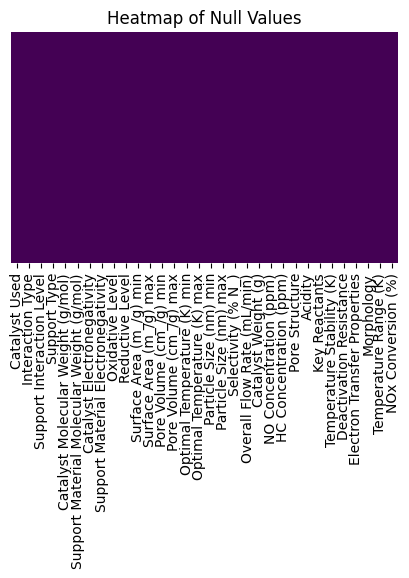

In [205]:
# Visualizing null values using a heatmap
plt.figure(figsize=(5, 3))  # Set the size of the plot
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False, xticklabels=True)

# Display the plot
plt.title("Heatmap of Null Values")
plt.show()


### Distribution of Categorical Features <a class="anchor" id="distribution-of-categorical-features"></a>
Explore the distribution of categorical features such as Pore Structure and Morphology against other categorical variables using histograms.


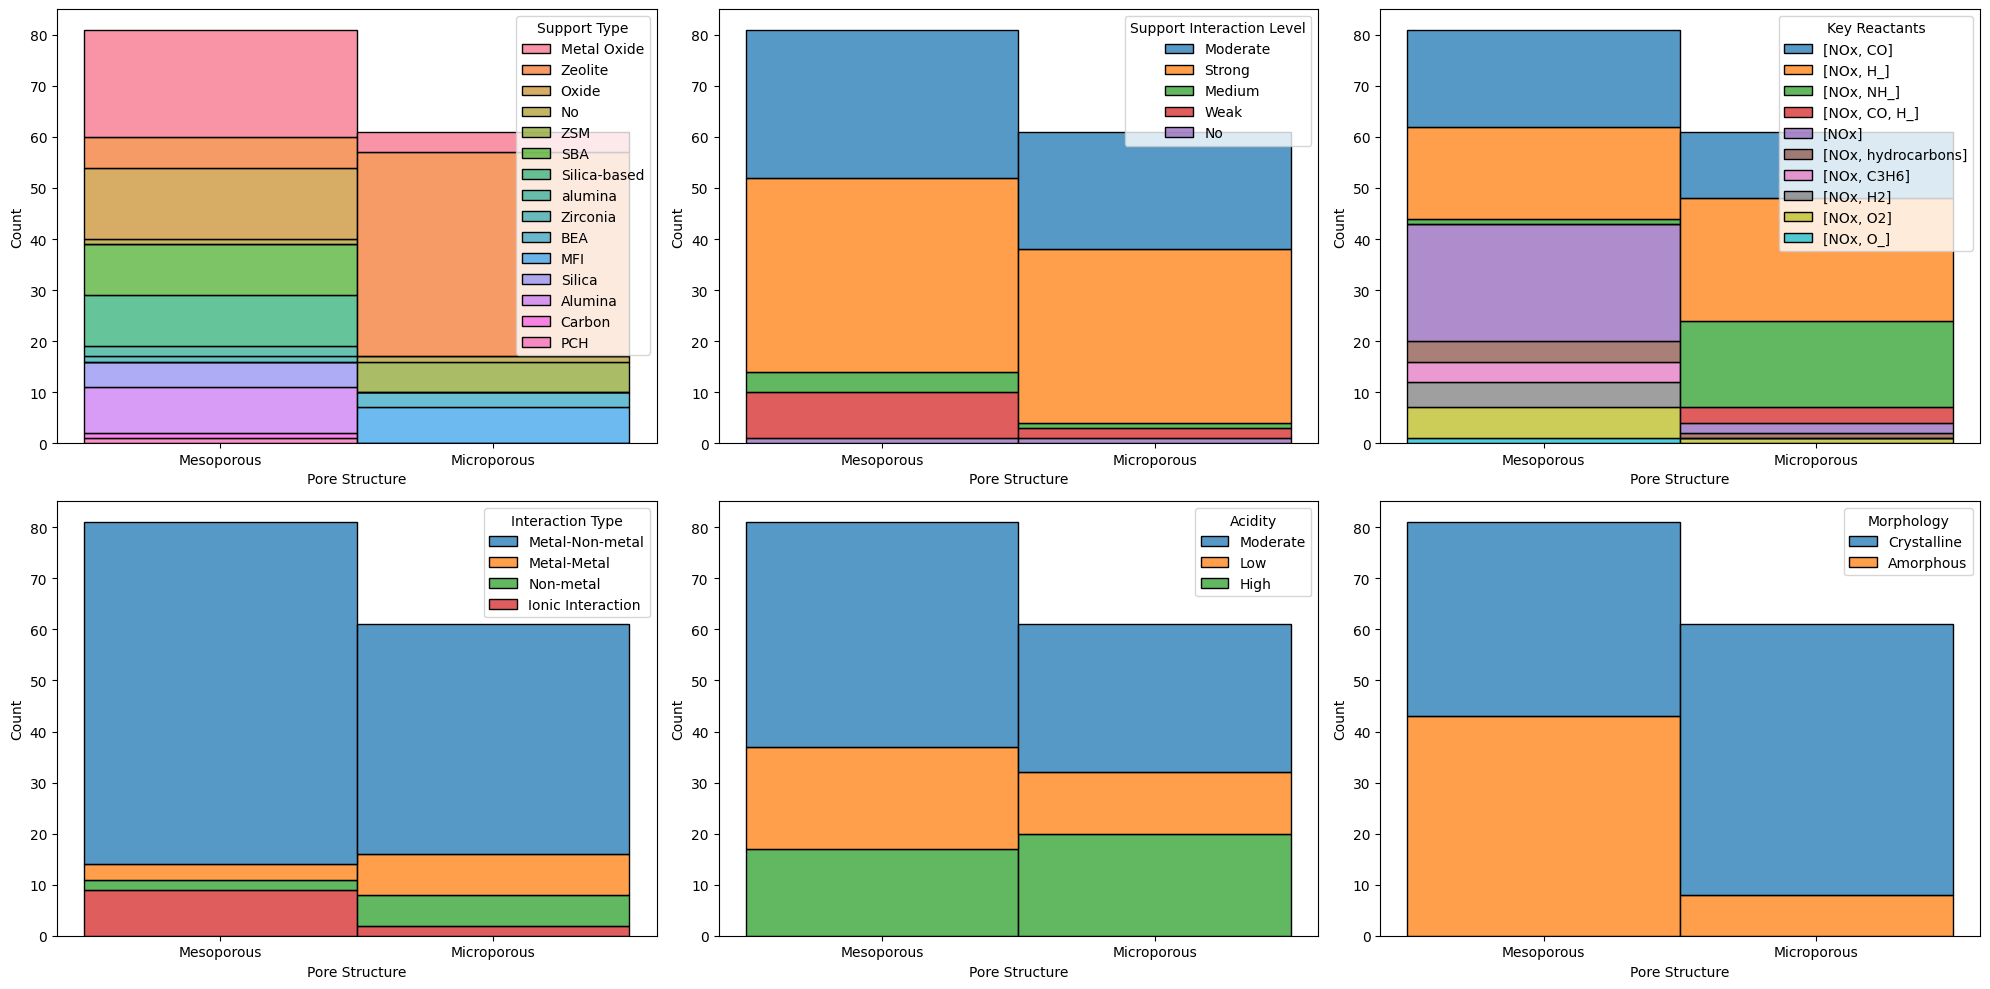

In [206]:
# Creating subplots for different categorical relationships
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Plotting distributions of Pore Structure against various categorical features
sns.histplot(data=df, x="Pore Structure", hue="Support Type", multiple="stack", ax=axes[0, 0])
sns.histplot(data=df, x="Pore Structure", hue="Support Interaction Level", multiple="stack", ax=axes[0, 1])
sns.histplot(data=df, x="Pore Structure", hue="Interaction Type", multiple="stack", ax=axes[1, 0])
sns.histplot(data=df, x="Pore Structure", hue="Acidity", multiple="stack", ax=axes[1, 1])
sns.histplot(data=df, x="Pore Structure", hue="Key Reactants", multiple="stack", ax=axes[0, 2])
sns.histplot(data=df, x="Pore Structure", hue="Morphology", multiple="stack", ax=axes[1, 2])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


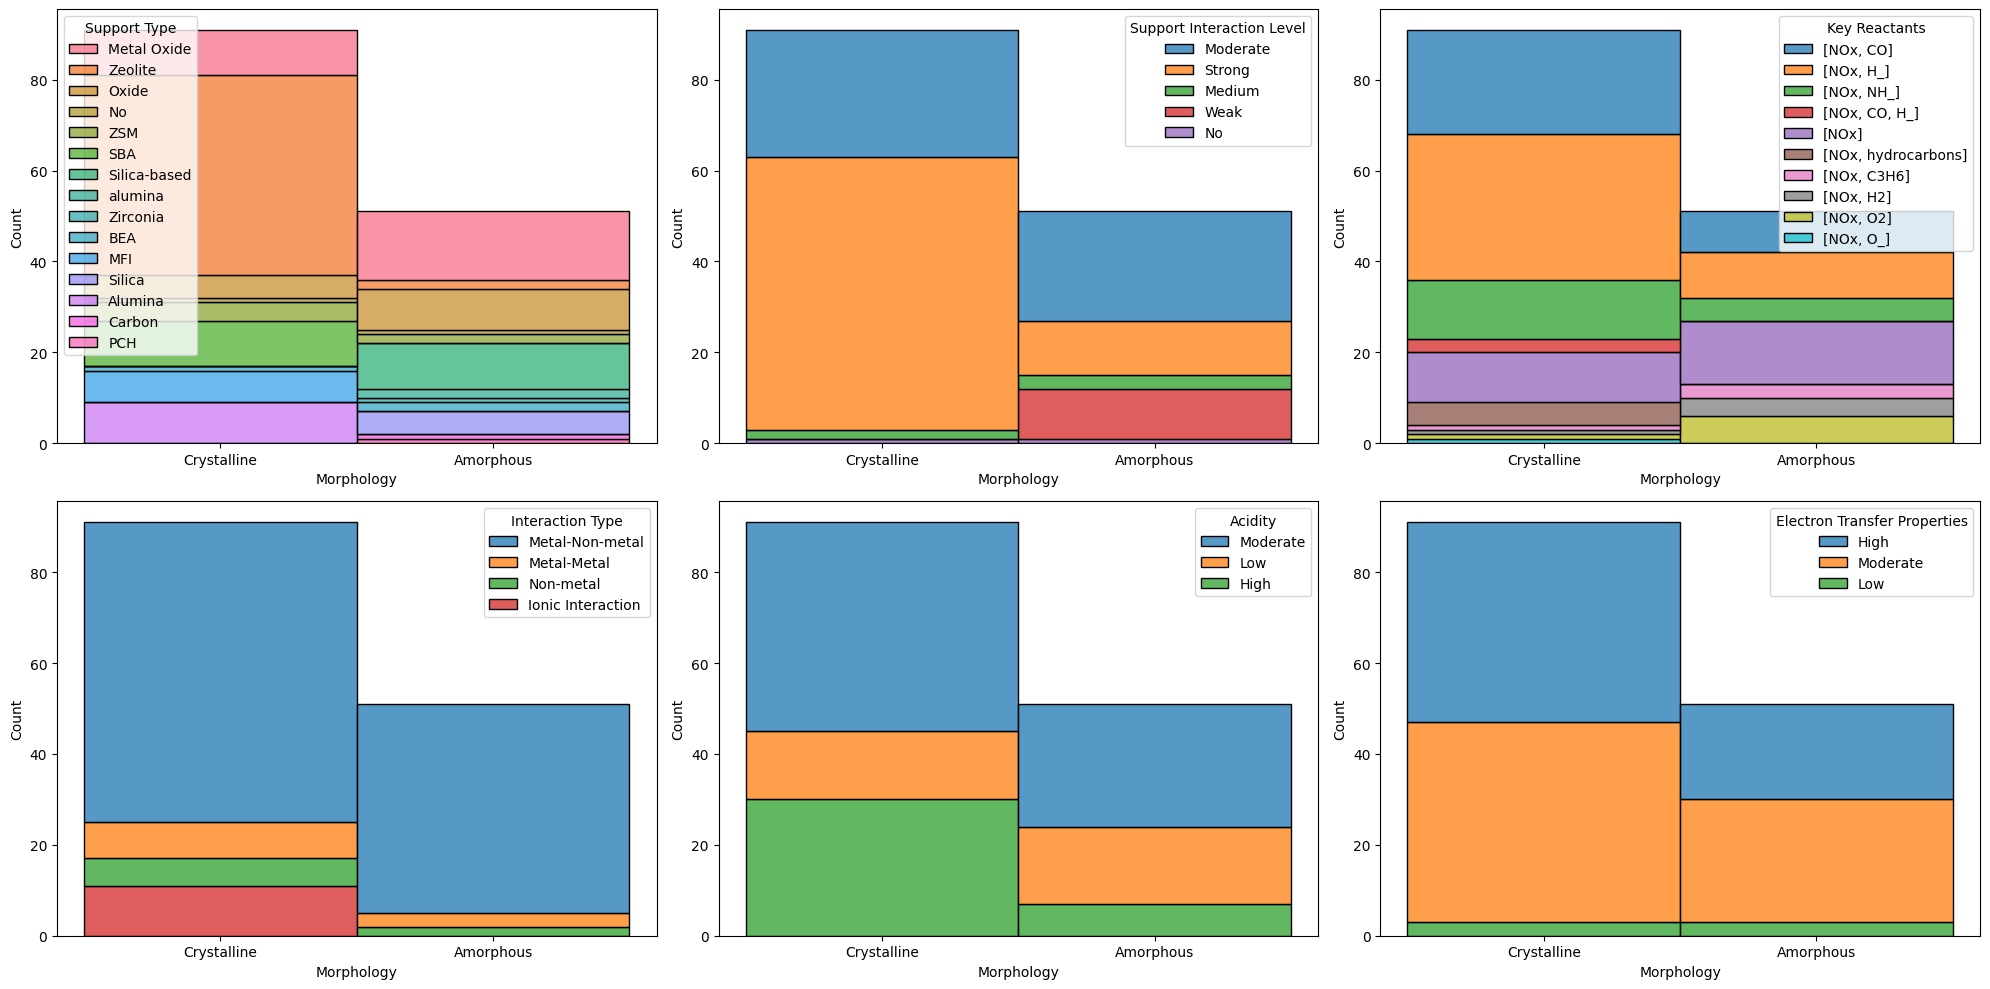

In [207]:
# Repeat the above plots for 'Morphology' feature
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

sns.histplot(data=df, x="Morphology", hue="Support Type", multiple="stack", ax=axes[0, 0])
sns.histplot(data=df, x="Morphology", hue="Support Interaction Level", multiple="stack", ax=axes[0, 1])
sns.histplot(data=df, x="Morphology", hue="Interaction Type", multiple="stack", ax=axes[1, 0])
sns.histplot(data=df, x="Morphology", hue="Acidity", multiple="stack", ax=axes[1, 1])
sns.histplot(data=df, x="Morphology", hue="Key Reactants", multiple="stack", ax=axes[0, 2])
sns.histplot(data=df, x="Morphology", hue="Electron Transfer Properties", multiple="stack", ax=axes[1, 2])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


---

## Data Preprocessing <a class="anchor" id="data-preprocessing"></a>


### Encoding Categorical Variables <a class="anchor" id="encoding-categorical-variables"></a>
Convert categorical features into numerical values using LabelEncoder to prepare the data for machine learning models.

In [208]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataframe for encoding
df2 = df.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = [
    'Interaction Type',
    'Support Interaction Level',
    'Support Type',
    'Pore Structure',
    'Acidity',
    'Key Reactants',
    'Deactivation Resistance',
    'Electron Transfer Properties',
    'Morphology'
]

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    df2[column] = label_encoder.fit_transform(df2[column])

# Display the first few rows of the encoded dataset
df2.head()


Catalyst Used  Interaction Type  Support Interaction Level  \
0        1% Ag2O/TiO2                 2                          1   
1  Ag/alumina (3% Ag)                 2                          1   
2               PdMOR                 1                          3   
3             CePdMOR                 1                          3   
4           In/SSZ-13                 2                          1   

   Support Type  Catalyst Molecular Weight (g/mol)  \
0             4                             232.80   
1             4                             216.20   
2            12                             106.42   
3            12                             207.30   
4            12                             114.82   

   Support Material Molecular Weight (g/mol)  Catalyst Electronegativity  \
0                                      79.90                        1.93   
1                                     101.96                        1.93   
2                                      34.50                        2.20   
3                                      34.50                        2.19   
4                                      94.00                        1.78   

   Support Material Electronegativity  Oxidative Level  Reductive Level  ...  \
0                                 5.2              2.0              0.0  ...   
1                                 4.2              0.0              2.0  ...   
2                                 3.3              2.0              2.0  ...   
3                                 3.3              0.0              2.0  ...   
4                                 3.6              2.0              0.0  ...   

   HC Concentration (ppm)  Pore Structure  Acidity  Key Reactants  \
0                   800.0               0        2              2   
1                  3000.0               0        2              4   
2                  2500.0               1        1              2   
3                  2500.0               1        2              2   
4                  3000.0               1        2              4   

   Temperature Stability (K)  Deactivation Resistance  \
0                      800.0                        0   
1                      900.0                        2   
2                      700.0                        0   
3                      750.0                        0   
4                      800.0                        2   

   Electron Transfer Properties  Morphology  Temperature Range (K)  \
0                             0           1                 573.00   
1                             0           0                 873.00   
2                             2           1                 673.00   
3                             2           1                 748.00   
4                             2           1                 973.15   

   NOx Conversion (%)  
0                42.0  
1                10.0  
2                90.0  
3                90.0  
4                75.0  

[5 rows x 32 columns]

### 3D Visualization of Catalyst Properties <a class="anchor" id="3d-visualization-of-catalyst-properties"></a>
Create various 3D scatter plots to visualize relationships between different catalyst properties and NOx conversion.

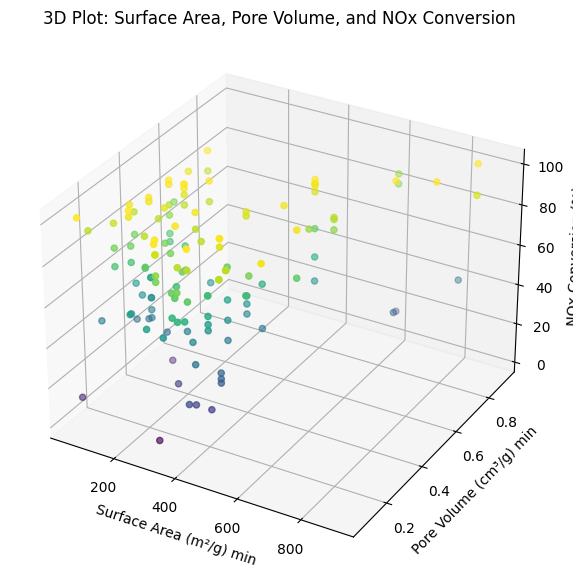

In [209]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Plot: Surface Area, Pore Volume, and NOx Conversion
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df2['Surface Area (m_/g) min'], 
    df2['Pore Volume (cm_/g) min'], 
    df2['NOx Conversion (%)'], 
    c=df2['NOx Conversion (%)'], cmap='viridis'
)

ax.set_xlabel('Surface Area (m²/g) min')
ax.set_ylabel('Pore Volume (cm³/g) min')
ax.set_zlabel('NOx Conversion (%)')
ax.set_title("3D Plot: Surface Area, Pore Volume, and NOx Conversion")
plt.show()


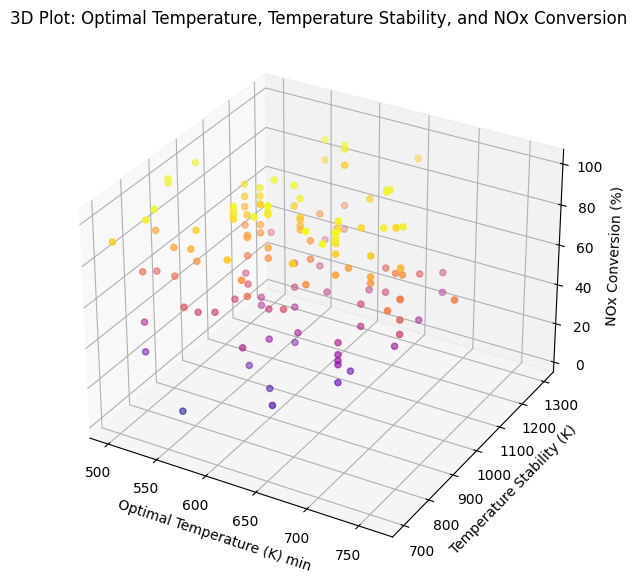

In [210]:
# 3D Plot: Optimal Temperature, Temperature Stability, and NOx Conversion
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df2['Optimal Temperature (K) min'], 
    df2['Temperature Stability (K)'], 
    df2['NOx Conversion (%)'], 
    c=df2['NOx Conversion (%)'], cmap='plasma'
)

ax.set_xlabel('Optimal Temperature (K) min')
ax.set_ylabel('Temperature Stability (K)')
ax.set_zlabel('NOx Conversion (%)')
ax.set_title("3D Plot: Optimal Temperature, Temperature Stability, and NOx Conversion")
plt.show()


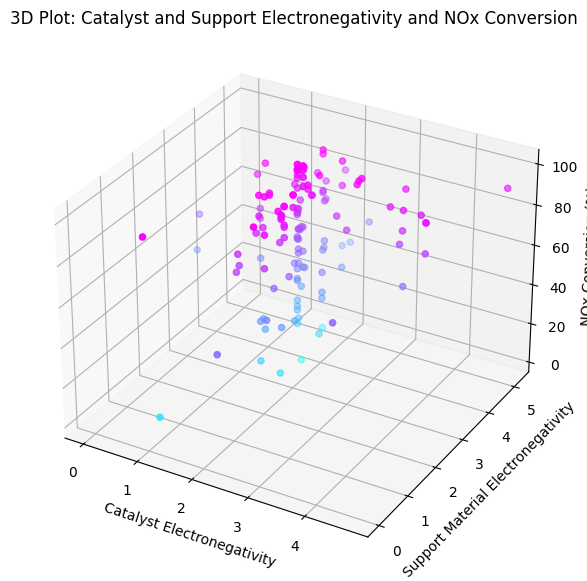

In [211]:
# 3D Plot: Catalyst Electronegativity, Support Electronegativity, and NOx Conversion
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df2['Catalyst Electronegativity'], 
    df2['Support Material Electronegativity'], 
    df2['NOx Conversion (%)'], 
    c=df2['NOx Conversion (%)'], cmap='cool'
)

ax.set_xlabel('Catalyst Electronegativity')
ax.set_ylabel('Support Material Electronegativity')
ax.set_zlabel('NOx Conversion (%)')
ax.set_title("3D Plot: Catalyst and Support Electronegativity and NOx Conversion")
plt.show()


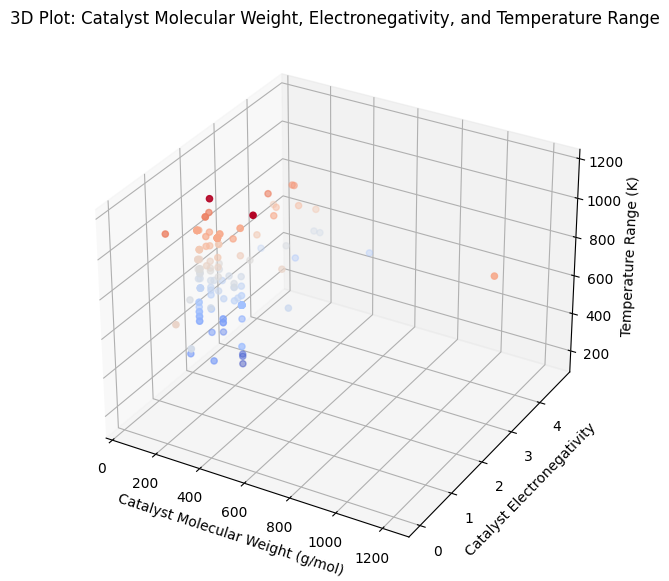

In [212]:
# 3D Plot: Catalyst Molecular Weight, Electronegativity, and Temperature Range
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df2['Catalyst Molecular Weight (g/mol)'], 
    df2['Catalyst Electronegativity'], 
    df2['Temperature Range (K)'], 
    c=df2['Temperature Range (K)'], cmap='coolwarm'
)

ax.set_xlabel('Catalyst Molecular Weight (g/mol)')
ax.set_ylabel('Catalyst Electronegativity')
ax.set_zlabel('Temperature Range (K)')
ax.set_title("3D Plot: Catalyst Molecular Weight, Electronegativity, and Temperature Range")
plt.show()


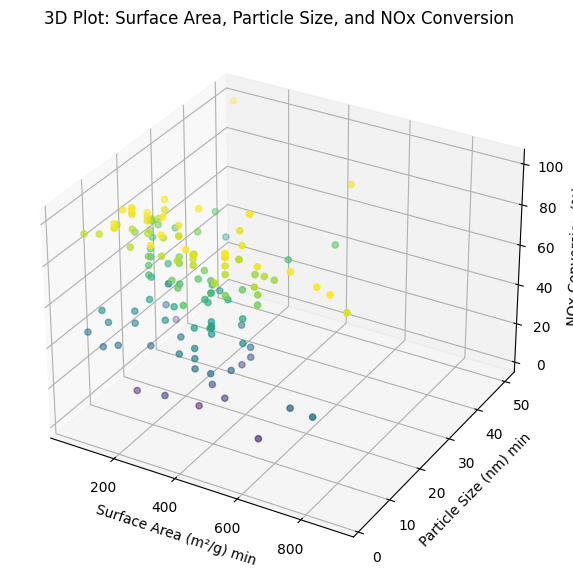

In [213]:
# 3D Plot: Surface Area, Particle Size, and NOx Conversion
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df2['Surface Area (m_/g) min'], 
    df2['Particle Size (nm) min'], 
    df2['NOx Conversion (%)'], 
    c=df2['NOx Conversion (%)'], cmap='viridis'
)

ax.set_xlabel('Surface Area (m²/g) min')
ax.set_ylabel('Particle Size (nm) min')
ax.set_zlabel('NOx Conversion (%)')
ax.set_title("3D Plot: Surface Area, Particle Size, and NOx Conversion")
plt.show()


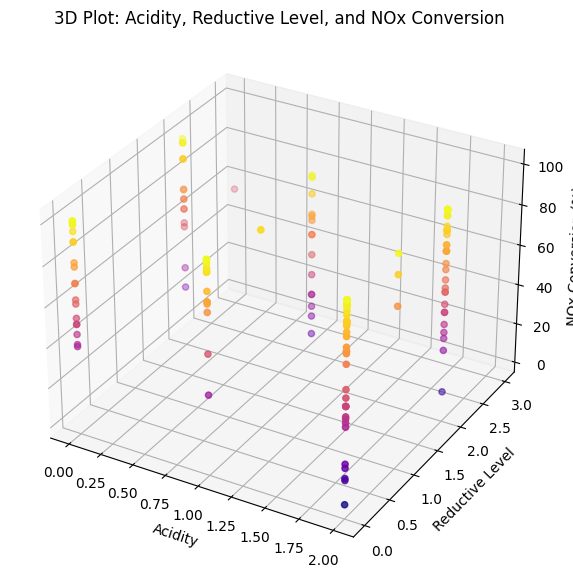

In [214]:
# 3D Plot: Acidity, Reductive Level, and NOx Conversion
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df2['Acidity'], 
    df2['Reductive Level'], 
    df2['NOx Conversion (%)'], 
    c=df2['NOx Conversion (%)'], cmap='plasma'
)

ax.set_xlabel('Acidity')
ax.set_ylabel('Reductive Level')
ax.set_zlabel('NOx Conversion (%)')
ax.set_title("3D Plot: Acidity, Reductive Level, and NOx Conversion")
plt.show()


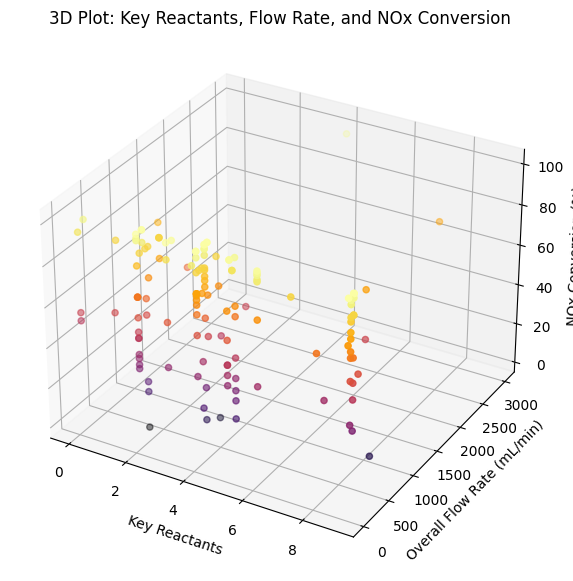

In [215]:
# 3D Plot: Key Reactants, Flow Rate, and NOx Conversion
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df2['Key Reactants'], 
    df2['Overall Flow Rate (mL/min)'], 
    df2['NOx Conversion (%)'], 
    c=df2['NOx Conversion (%)'], cmap='inferno'
)

ax.set_xlabel('Key Reactants')
ax.set_ylabel('Overall Flow Rate (mL/min)')
ax.set_zlabel('NOx Conversion (%)')
ax.set_title("3D Plot: Key Reactants, Flow Rate, and NOx Conversion")
plt.show()


---
## Correlation and Variance Analysis <a  class="anchor" id="correlation-and-variance-analysis"></a>

### Drop Irrelevant Columns <a class="anchor" id="drop-irrelevant-columns"></a>
Remove the 'Catalyst Used' column as it is not relevant for modeling.

In [216]:
# Dropping the 'Catalyst Used' column from the dataset
df2 = df2.drop(['Catalyst Used'], axis=1)

# Displaying the first few rows of the updated dataset to confirm the drop
df2.head()


Interaction Type  Support Interaction Level  Support Type  \
0                 2                          1             4   
1                 2                          1             4   
2                 1                          3            12   
3                 1                          3            12   
4                 2                          1            12   

   Catalyst Molecular Weight (g/mol)  \
0                             232.80   
1                             216.20   
2                             106.42   
3                             207.30   
4                             114.82   

   Support Material Molecular Weight (g/mol)  Catalyst Electronegativity  \
0                                      79.90                        1.93   
1                                     101.96                        1.93   
2                                      34.50                        2.20   
3                                      34.50                        2.19   
4                                      94.00                        1.78   

   Support Material Electronegativity  Oxidative Level  Reductive Level  \
0                                 5.2              2.0              0.0   
1                                 4.2              0.0              2.0   
2                                 3.3              2.0              2.0   
3                                 3.3              0.0              2.0   
4                                 3.6              2.0              0.0   

   Surface Area (m_/g) min  ...  HC Concentration (ppm)  Pore Structure  \
0                     50.0  ...                   800.0               0   
1                    150.0  ...                  3000.0               0   
2                    500.0  ...                  2500.0               1   
3                    500.0  ...                  2500.0               1   
4                    400.0  ...                  3000.0               1   

   Acidity  Key Reactants  Temperature Stability (K)  Deactivation Resistance  \
0        2              2                      800.0                        0   
1        2              4                      900.0                        2   
2        1              2                      700.0                        0   
3        2              2                      750.0                        0   
4        2              4                      800.0                        2   

   Electron Transfer Properties  Morphology  Temperature Range (K)  \
0                             0           1                 573.00   
1                             0           0                 873.00   
2                             2           1                 673.00   
3                             2           1                 748.00   
4                             2           1                 973.15   

   NOx Conversion (%)  
0                42.0  
1                10.0  
2                90.0  
3                90.0  
4                75.0  

[5 rows x 31 columns]

### Correlation Matrix <a class="anchor" id="correlation-matrix"></a>
Analyze the correlation between different features to understand the relationships and identify potential multicollinearity issues.

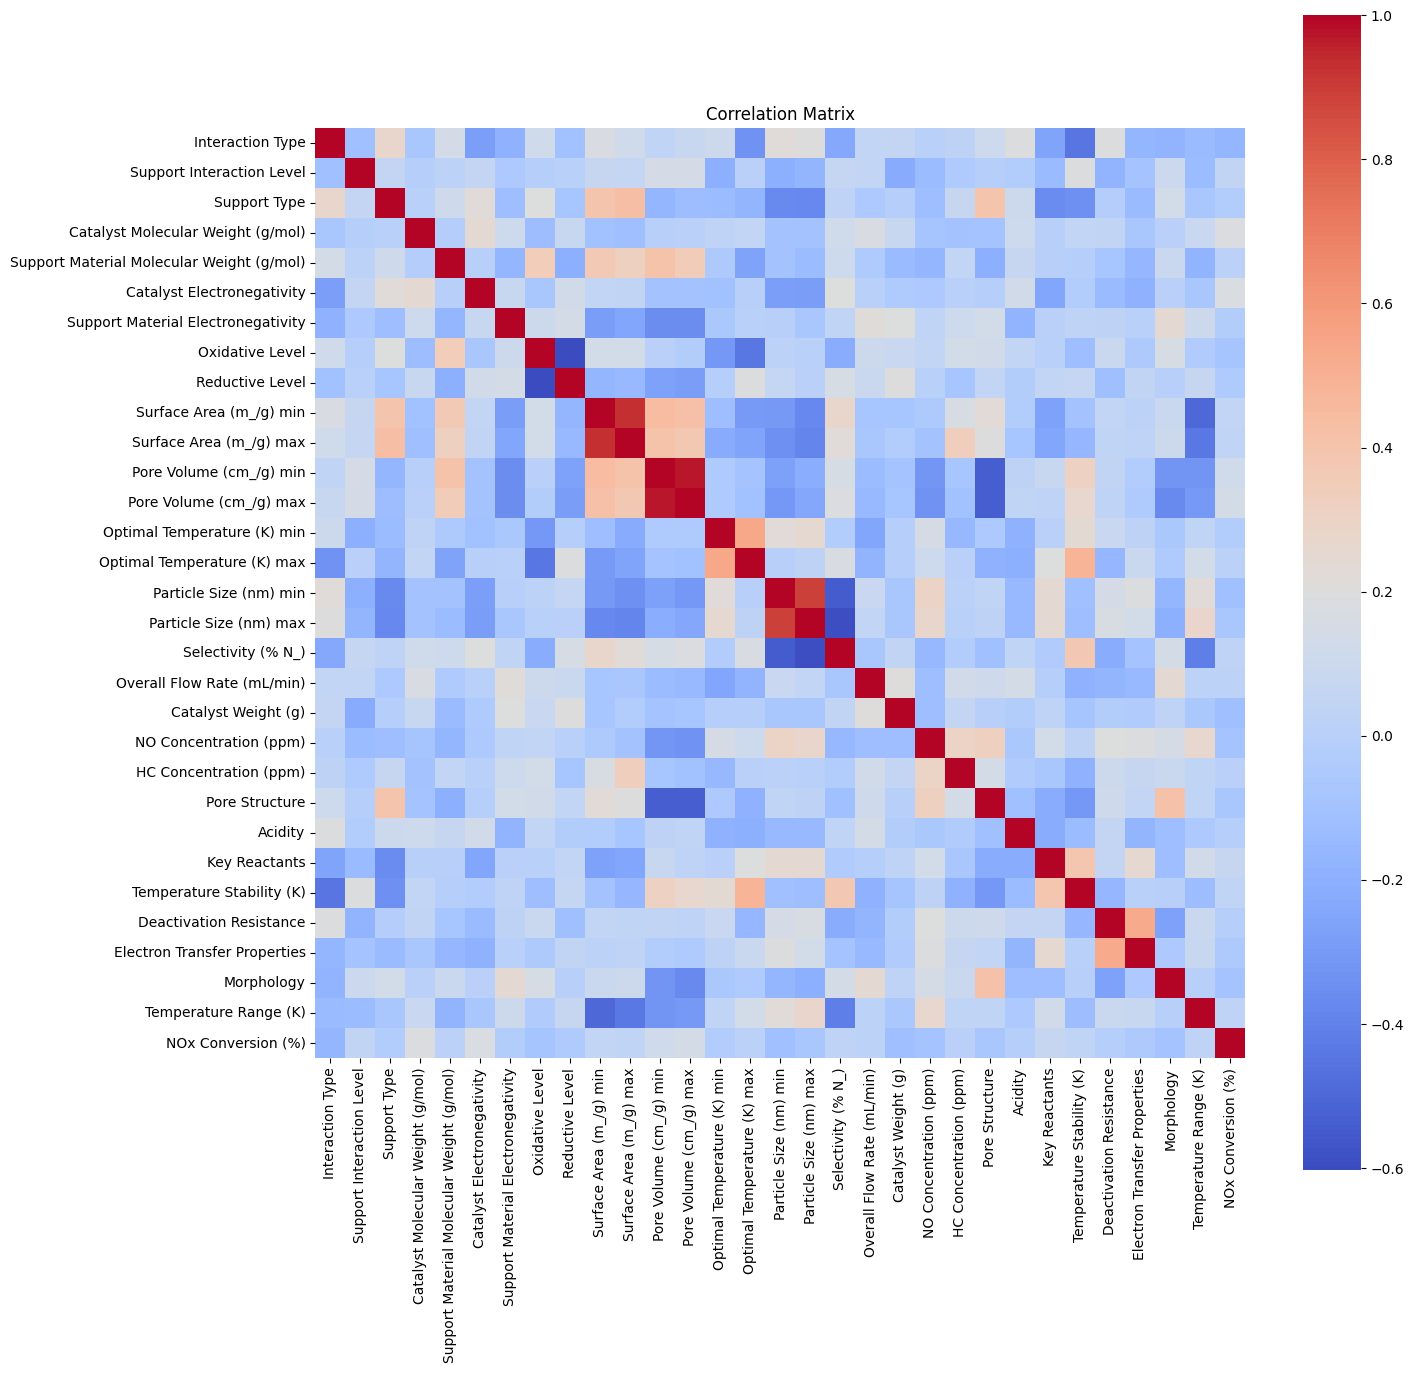

In [217]:
# Correlation matrix
corr_matrix = df2.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, cmap='coolwarm', fmt='.2f', cbar=True, square=True)

# Show the plot
plt.title('Correlation Matrix')
plt.show()


### Principal Component Analysis (PCA) <a class="anchor" id="principal-component-analysis-pca"></a>
Perform PCA to reduce dimensionality and identify principal components that capture the most variance.

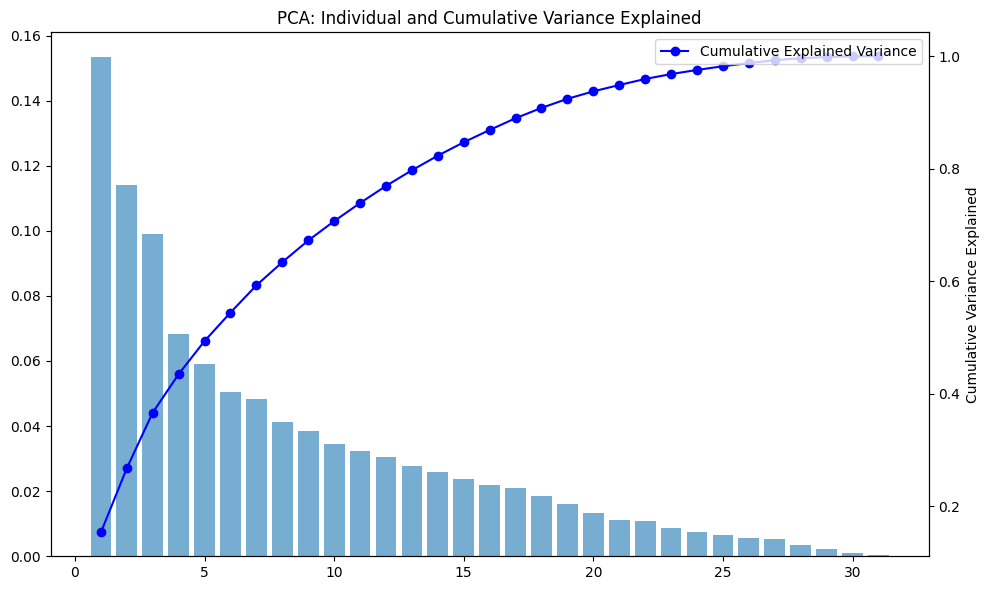

In [218]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the data
df_scaled = scaler.fit_transform(df2)

# Apply PCA
pca = PCA()
pca.fit(df_scaled)

# Explained variances (individual and cumulative)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot individual and cumulative explained variance
plt.figure(figsize=(10, 6))

# Plot individual variance
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, label='Individual Explained Variance')

# Create a secondary y-axis to plot the cumulative variance
ax2 = plt.gca().twinx()
ax2.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='b', label='Cumulative Explained Variance')

# Labels and title
plt.xlabel('Principal Component')
plt.ylabel('Individual Variance Explained')
ax2.set_ylabel('Cumulative Variance Explained')
plt.title('PCA: Individual and Cumulative Variance Explained')

# Add legends
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


### Correlation with Principal Components <a class="anchor" id="correlation-with-principal-components"></a>
Examine how original features correlate with the first 10 principal components. The purpose of this analysis is to examine how the original features of our dataset correlate with the first 10 principal components derived from PCA. By focusing on these top components, we aim to understand which original variables contribute most strongly to each principal component, offering insights into the structure of the data after dimensionality reduction.

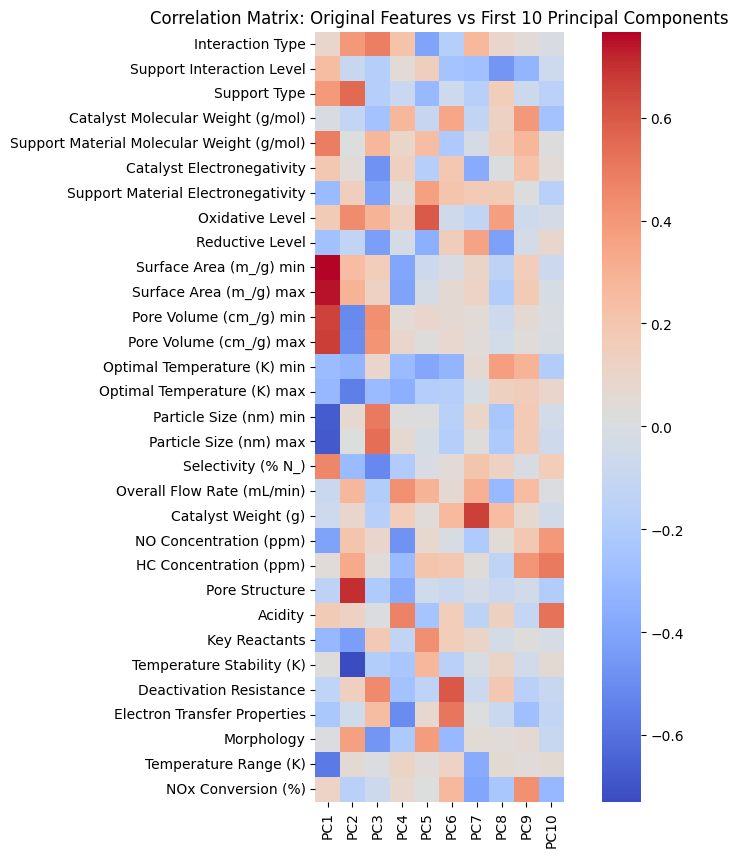

In [219]:
# Apply PCA with first 10 components
pca = PCA(n_components=10)
pca.fit(df_scaled)

# Get the first 10 principal components
pca_components = pca.transform(df_scaled)[:, :10]

# Create a DataFrame for the principal components
pc_df = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(10)])

# Create the correlation matrix between the original features and the first 10 principal components
correlation_matrix = pd.DataFrame(
    np.corrcoef(df_scaled.T, pc_df.T, rowvar=True)[:df_scaled.shape[1], df_scaled.shape[1]:],
    index=df2.columns,
    columns=pc_df.columns
)

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f', cbar=True, square=True)

# Add title and labels
plt.title('Correlation Matrix: Original Features vs First 10 Principal Components')
plt.show()


---
## Machine Learning Model Development <a class="anchor" id="machine-learning-model-development"></a>

### Preparing Data for Modeling <a class="anchor" id="preparing-data-for-modeling"></a>
Split the dataset into training and testing sets for both target variables: Temperature Range and NOx Conversion.

In [220]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into features and targets
X = df2.iloc[:, :29]
y = df2.iloc[:, 29:31]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Display the shapes of the splits
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(113, 29) (29, 29) (113, 2) (29, 2)


### Linear Regression Model <a class="anchor" id="linear-regression"></a>
Train and evaluate a Linear Regression model for both Temperature Range and NOx Conversion.

In [221]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train for Temperature Range (K)
model.fit(X_train, y_train['Temperature Range (K)'])
y_pred_1_train = model.predict(X_train)  # Prediction on training data
y_pred_1_test = model.predict(X_test)    # Prediction on testing data

# Train for NOx Conversion (%)
model.fit(X_train, y_train['NOx Conversion (%)'])
y_pred_2_train = model.predict(X_train)  # Prediction on training data
y_pred_2_test = model.predict(X_test)    # Prediction on testing data

# Calculate MSE and R-squared for Temperature Range
mse_1_train = mean_squared_error(y_train['Temperature Range (K)'], y_pred_1_train)
r2_1_train = r2_score(y_train['Temperature Range (K)'], y_pred_1_train)
mse_1_test = mean_squared_error(y_test['Temperature Range (K)'], y_pred_1_test)
r2_1_test = r2_score(y_test['Temperature Range (K)'], y_pred_1_test)

# Calculate MSE and R-squared for NOx Conversion
mse_2_train = mean_squared_error(y_train['NOx Conversion (%)'], y_pred_2_train)
r2_2_train = r2_score(y_train['NOx Conversion (%)'], y_pred_2_train)
mse_2_test = mean_squared_error(y_test['NOx Conversion (%)'], y_pred_2_test)
r2_2_test = r2_score(y_test['NOx Conversion (%)'], y_pred_2_test)

# Add performance metrics to the dictionary
addtodf('LinearRegression_train_NOx', mse_2_train, r2_2_train)
addtodf('LinearRegression_train_temp', mse_1_train, r2_1_train)
addtodf('LinearRegression_test_NOx', mse_2_test, r2_2_test)
addtodf('LinearRegression_test_temp', mse_1_test, r2_1_test)


### Visualizing Linear Regression Predictions <a class="anchor" id="visualizing-linear-regression-predictions"></a>
Plot the predicted vs actual values for both targets.

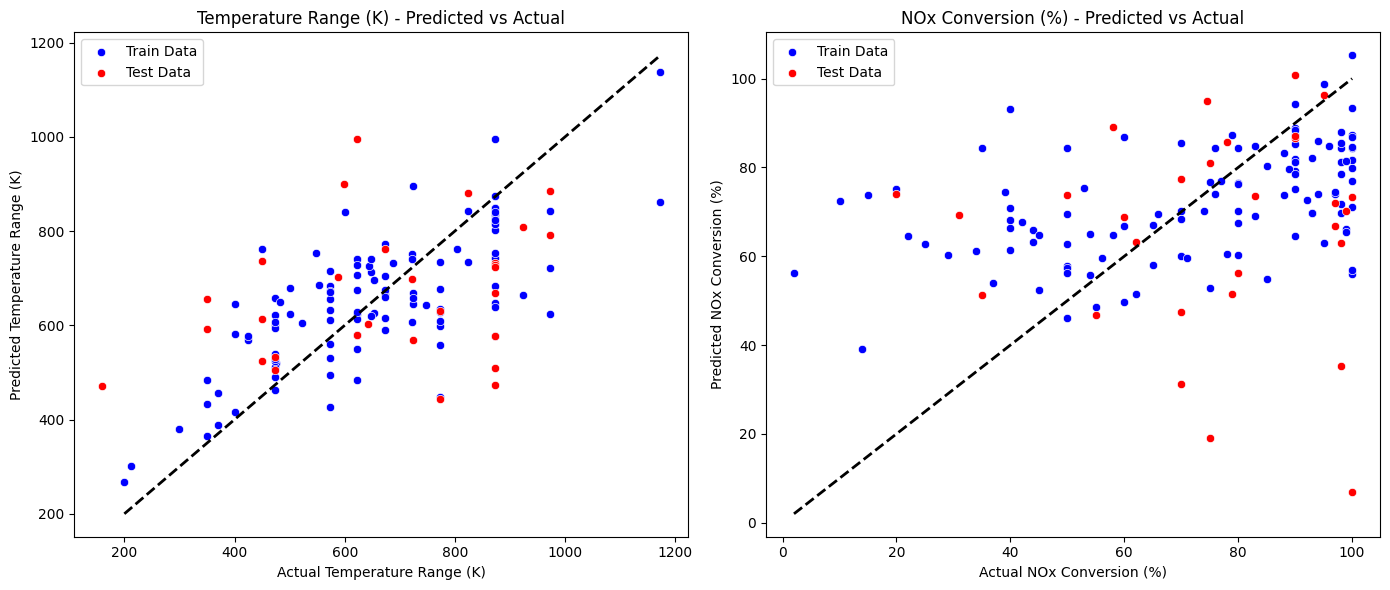

In [222]:
# Plotting predictions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Temperature Range (K)
sns.scatterplot(x=y_train['Temperature Range (K)'], y=y_pred_1_train, ax=axes[0], color='blue', label='Train Data')
sns.scatterplot(x=y_test['Temperature Range (K)'], y=y_pred_1_test, ax=axes[0], color='red', label='Test Data')
axes[0].plot(
    [y_train['Temperature Range (K)'].min(), y_train['Temperature Range (K)'].max()],
    [y_train['Temperature Range (K)'].min(), y_train['Temperature Range (K)'].max()],
    'k--', lw=2
)
axes[0].set_title('Temperature Range (K) - Predicted vs Actual')
axes[0].set_xlabel('Actual Temperature Range (K)')
axes[0].set_ylabel('Predicted Temperature Range (K)')
axes[0].legend()

# NOx Conversion (%)
sns.scatterplot(x=y_train['NOx Conversion (%)'], y=y_pred_2_train, ax=axes[1], color='blue', label='Train Data')
sns.scatterplot(x=y_test['NOx Conversion (%)'], y=y_pred_2_test, ax=axes[1], color='red', label='Test Data')
axes[1].plot(
    [y_train['NOx Conversion (%)'].min(), y_train['NOx Conversion (%)'].max()],
    [y_train['NOx Conversion (%)'].min(), y_train['NOx Conversion (%)'].max()],
    'k--', lw=2
)
axes[1].set_title('NOx Conversion (%) - Predicted vs Actual')
axes[1].set_xlabel('Actual NOx Conversion (%)')
axes[1].set_ylabel('Predicted NOx Conversion (%)')
axes[1].legend()

plt.tight_layout()
plt.show()


### Output Performance Metrics <a class="anchor" id="output-performance-metrics"></a>
Display the performance metrics for the Linear Regression model.

In [223]:
# Output performance metrics
print("For Temperature Range (K):")
print(f"Training MSE: {mse_1_train}")
print(f"Training R-squared: {r2_1_train}")
print(f"Test MSE: {mse_1_test}")
print(f"Test R-squared: {r2_1_test}")

print("\nFor NOx Conversion (%):")
print(f"Training MSE: {mse_2_train}")
print(f"Training R-squared: {r2_2_train}")
print(f"Test MSE: {mse_2_test}")
print(f"Test R-squared: {r2_2_test}")


For Temperature Range (K):
Training MSE: 16177.587784781055
Training R-squared: 0.5407359206687252
Test MSE: 45399.76260510736
Test R-squared: -0.021614175796591528

For NOx Conversion (%):
Training MSE: 489.3767142516031
Training R-squared: 0.23540240102346188
Test MSE: 1052.375345293837
Test R-squared: -1.2801781045029905


### Random Forest Regressor <a class="anchor" id="random-forest-regressor"></a>
Train and evaluate a Random Forest Regressor for both targets.

In [224]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the RandomForestRegressor
model = RandomForestRegressor(random_state=12)

# Train for Temperature Range (K)
model.fit(X_train, y_train['Temperature Range (K)'])
y_pred_1_train = model.predict(X_train)  # Prediction on training data
y_pred_1_test = model.predict(X_test)    # Prediction on testing data

# Store feature importance for Temperature Range (K)
importance_1 = model.feature_importances_

# Train for NOx Conversion (%)
model.fit(X_train, y_train['NOx Conversion (%)'])
y_pred_2_train = model.predict(X_train)  # Prediction on training data
y_pred_2_test = model.predict(X_test)    # Prediction on testing data

# Store feature importance for NOx Conversion (%)
importance_2 = model.feature_importances_

# Calculate MSE and R-squared for Temperature Range
mse_1_train = mean_squared_error(y_train['Temperature Range (K)'], y_pred_1_train)
r2_1_train = r2_score(y_train['Temperature Range (K)'], y_pred_1_train)
mse_1_test = mean_squared_error(y_test['Temperature Range (K)'], y_pred_1_test)
r2_1_test = r2_score(y_test['Temperature Range (K)'], y_pred_1_test)

# Calculate MSE and R-squared for NOx Conversion
mse_2_train = mean_squared_error(y_train['NOx Conversion (%)'], y_pred_2_train)
r2_2_train = r2_score(y_train['NOx Conversion (%)'], y_pred_2_train)
mse_2_test = mean_squared_error(y_test['NOx Conversion (%)'], y_pred_2_test)
r2_2_test = r2_score(y_test['NOx Conversion (%)'], y_pred_2_test)

# Add performance metrics to the dictionary
addtodf('RandomForestRegressor_train_NOx', mse_2_train, r2_2_train)
addtodf('RandomForestRegressor_train_temp', mse_1_train, r2_1_train)
addtodf('RandomForestRegressor_test_NOx', mse_2_test, r2_2_test)
addtodf('RandomForestRegressor_test_temp', mse_1_test, r2_1_test)


### Visualizing Random Forest Predictions <a class="anchor" id="visualizing-random-forest-predictions"></a>
Plot the predicted vs actual values for both targets using the Random Forest model.

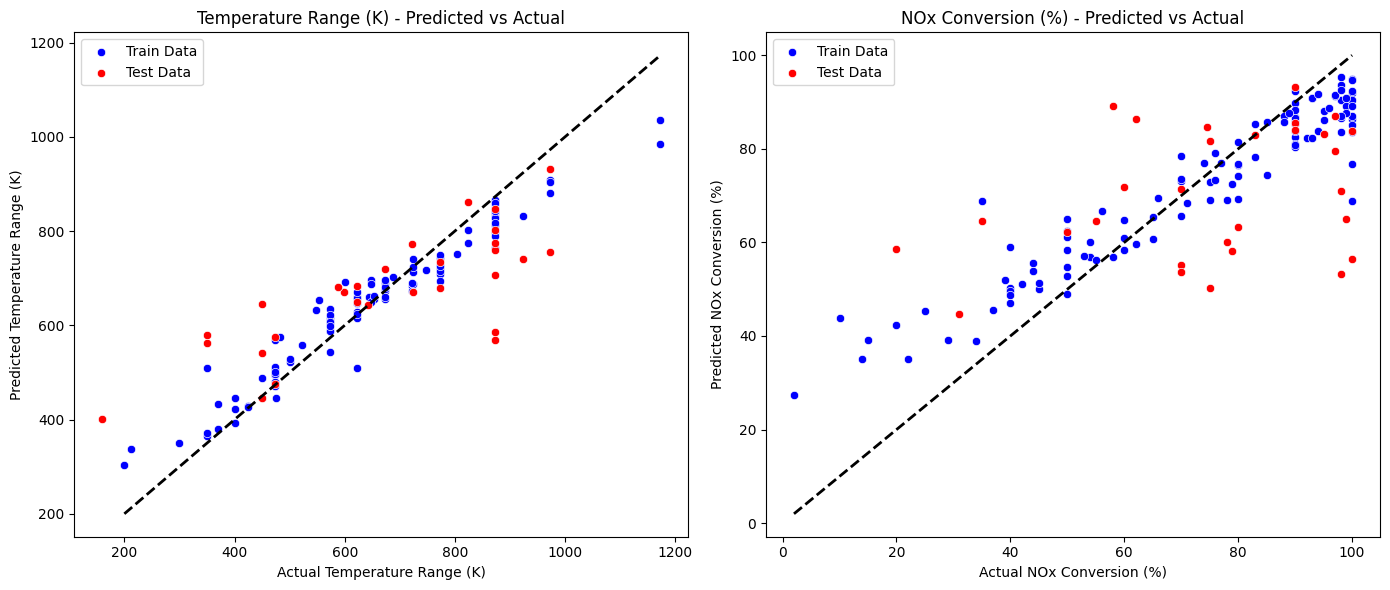

In [225]:
# Plotting predictions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Temperature Range (K)
sns.scatterplot(x=y_train['Temperature Range (K)'], y=y_pred_1_train, ax=axes[0], color='blue', label='Train Data')
sns.scatterplot(x=y_test['Temperature Range (K)'], y=y_pred_1_test, ax=axes[0], color='red', label='Test Data')
axes[0].plot(
    [y_train['Temperature Range (K)'].min(), y_train['Temperature Range (K)'].max()],
    [y_train['Temperature Range (K)'].min(), y_train['Temperature Range (K)'].max()],
    'k--', lw=2
)
axes[0].set_title('Temperature Range (K) - Predicted vs Actual')
axes[0].set_xlabel('Actual Temperature Range (K)')
axes[0].set_ylabel('Predicted Temperature Range (K)')
axes[0].legend()

# NOx Conversion (%)
sns.scatterplot(x=y_train['NOx Conversion (%)'], y=y_pred_2_train, ax=axes[1], color='blue', label='Train Data')
sns.scatterplot(x=y_test['NOx Conversion (%)'], y=y_pred_2_test, ax=axes[1], color='red', label='Test Data')
axes[1].plot(
    [y_train['NOx Conversion (%)'].min(), y_train['NOx Conversion (%)'].max()],
    [y_train['NOx Conversion (%)'].min(), y_train['NOx Conversion (%)'].max()],
    'k--', lw=2
)
axes[1].set_title('NOx Conversion (%) - Predicted vs Actual')
axes[1].set_xlabel('Actual NOx Conversion (%)')
axes[1].set_ylabel('Predicted NOx Conversion (%)')
axes[1].legend()

plt.tight_layout()
plt.show()


### Output Performance Metrics <a class="anchor" id="output-performance-metrics"></a>
Display the performance metrics for the Random Forest Regressor model.

In [226]:
# Output performance metrics
print("For Temperature Range (K):")
print(f"Training MSE: {mse_1_train}")
print(f"Training R-squared: {r2_1_train}")
print(f"Test MSE: {mse_1_test}")
print(f"Test R-squared: {r2_1_test}")

print("\nFor NOx Conversion (%):")
print(f"Training MSE: {mse_2_train}")
print(f"Training R-squared: {r2_2_train}")
print(f"Test MSE: {mse_2_test}")
print(f"Test R-squared: {r2_2_test}")


For Temperature Range (K):
Training MSE: 2784.5424583317754
Training R-squared: 0.9209498755007439
Test MSE: 19385.292694572596
Test R-squared: 0.5637798816041928

For NOx Conversion (%):
Training MSE: 111.20186696779744
Training R-squared: 0.8262592436272467
Test MSE: 463.76222983716474
Test R-squared: -0.004832056261190321


### Feature Importance Visualization <a class="anchor" id="feature-importance-visualization"></a>
Visualize the feature importance for the Random Forest model to understand the key factors influencing NOx conversion and temperature range.

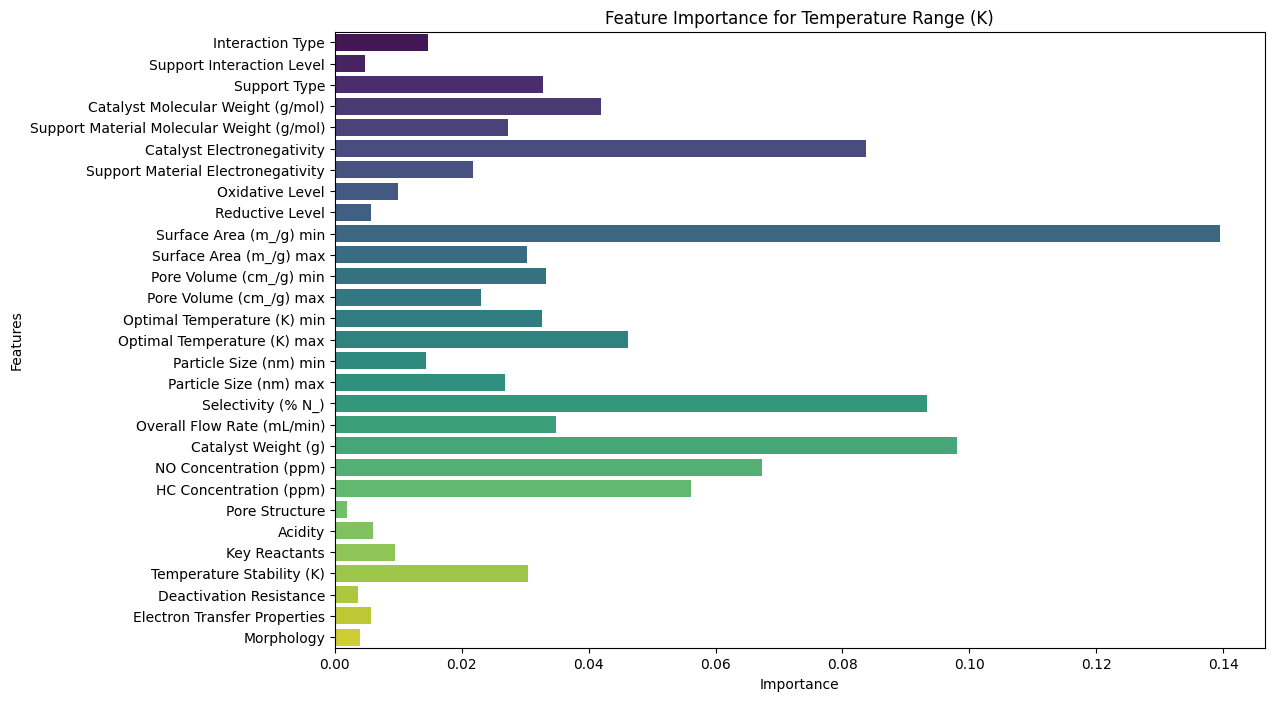

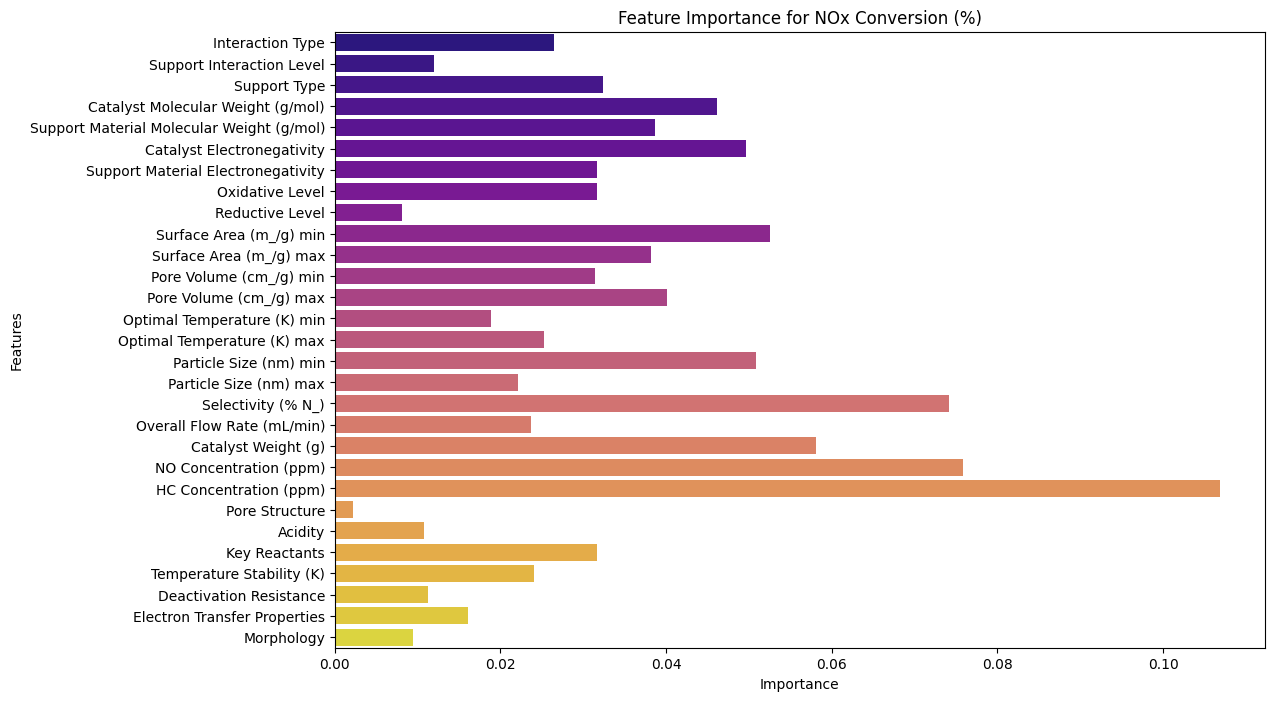

In [227]:
# Plotting Feature Importance for Temperature Range (K)
plt.figure(figsize=(12, 8))
sns.barplot(x=importance_1, y=X_train.columns, palette="viridis")
plt.title("Feature Importance for Temperature Range (K)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Plotting Feature Importance for NOx Conversion (%)
plt.figure(figsize=(12, 8))
sns.barplot(x=importance_2, y=X_train.columns, palette="plasma")
plt.title("Feature Importance for NOx Conversion (%)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


### XGBoost Regressor <a class="anchor" id="xgboost-regressor"></a>
Train and evaluate an XGBoost Regressor for both targets.

In [228]:
import xgboost as xgb

# Initialize the XGBRegressor
model = xgb.XGBRegressor(random_state=12, booster='gbtree', max_depth=12, learning_rate=0.01, n_estimators=200)

# Train for Temperature Range (K)
model.fit(X_train, y_train['Temperature Range (K)'])
y_pred_1_train = model.predict(X_train)  # Prediction on training data
y_pred_1_test = model.predict(X_test)    # Prediction on testing data

# Store feature importance for Temperature Range (K)
importance_1 = model.get_booster().get_score(importance_type='weight')  # 'weight', 'gain', or 'cover'

# Train for NOx Conversion (%)
model.fit(X_train, y_train['NOx Conversion (%)'])
y_pred_2_train = model.predict(X_train)  # Prediction on training data
y_pred_2_test = model.predict(X_test)    # Prediction on testing data

# Store feature importance for NOx Conversion (%)
importance_2 = model.get_booster().get_score(importance_type='weight')  # 'weight', 'gain', or 'cover'

# Calculate MSE and R-squared for Temperature Range
mse_1_train = mean_squared_error(y_train['Temperature Range (K)'], y_pred_1_train)
r2_1_train = r2_score(y_train['Temperature Range (K)'], y_pred_1_train)
mse_1_test = mean_squared_error(y_test['Temperature Range (K)'], y_pred_1_test)
r2_1_test = r2_score(y_test['Temperature Range (K)'], y_pred_1_test)

# Calculate MSE and R-squared for NOx Conversion
mse_2_train = mean_squared_error(y_train['NOx Conversion (%)'], y_pred_2_train)
r2_2_train = r2_score(y_train['NOx Conversion (%)'], y_pred_2_train)
mse_2_test = mean_squared_error(y_test['NOx Conversion (%)'], y_pred_2_test)
r2_2_test = r2_score(y_test['NOx Conversion (%)'], y_pred_2_test)

# Add performance metrics to the dictionary
addtodf('XGBRegressor_train_NOx', mse_2_train, r2_2_train)
addtodf('XGBRegressor_train_temp', mse_1_train, r2_1_train)
addtodf('XGBRegressor_test_NOx', mse_2_test, r2_2_test)
addtodf('XGBRegressor_test_temp', mse_1_test, r2_1_test)


### Visualizing XGBoost Predictions <a class="anchor" id="visualizing-xgboost-predictions"></a>
Plot the predicted vs actual values for both targets using the XGBoost model.

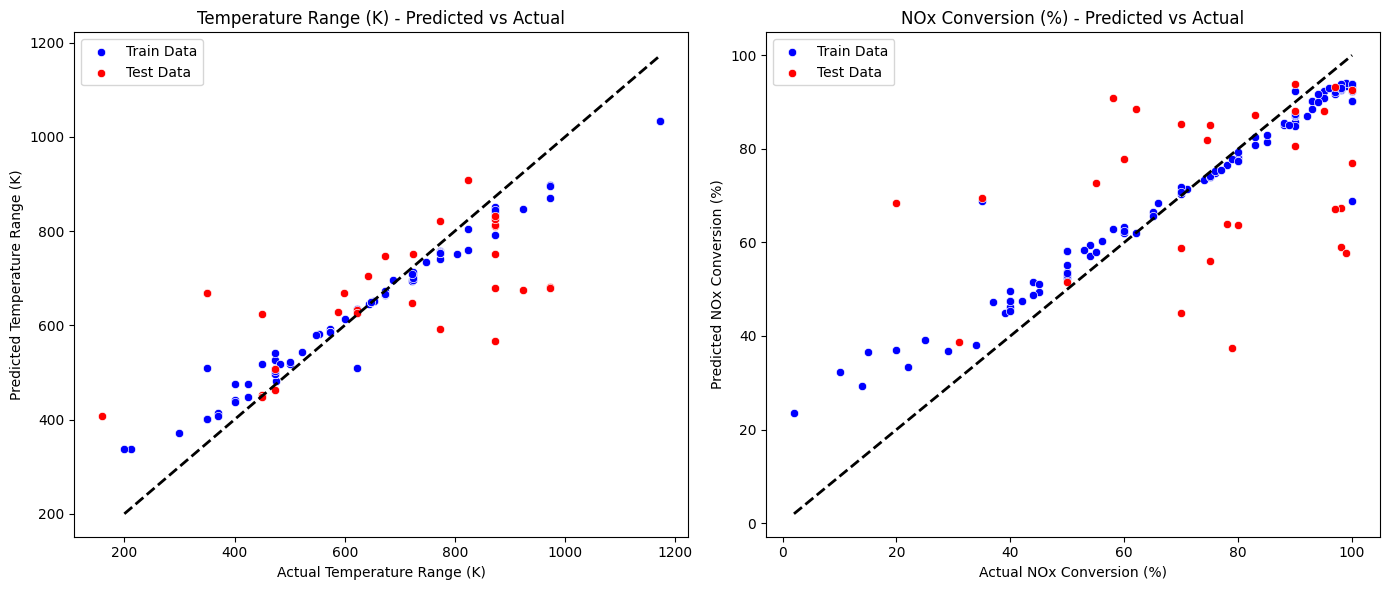

In [229]:
# Plotting predictions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Temperature Range (K)
sns.scatterplot(x=y_train['Temperature Range (K)'], y=y_pred_1_train, ax=axes[0], color='blue', label='Train Data')
sns.scatterplot(x=y_test['Temperature Range (K)'], y=y_pred_1_test, ax=axes[0], color='red', label='Test Data')
axes[0].plot(
    [y_train['Temperature Range (K)'].min(), y_train['Temperature Range (K)'].max()],
    [y_train['Temperature Range (K)'].min(), y_train['Temperature Range (K)'].max()],
    'k--', lw=2
)
axes[0].set_title('Temperature Range (K) - Predicted vs Actual')
axes[0].set_xlabel('Actual Temperature Range (K)')
axes[0].set_ylabel('Predicted Temperature Range (K)')
axes[0].legend()

# NOx Conversion (%)
sns.scatterplot(x=y_train['NOx Conversion (%)'], y=y_pred_2_train, ax=axes[1], color='blue', label='Train Data')
sns.scatterplot(x=y_test['NOx Conversion (%)'], y=y_pred_2_test, ax=axes[1], color='red', label='Test Data')
axes[1].plot(
    [y_train['NOx Conversion (%)'].min(), y_train['NOx Conversion (%)'].max()],
    [y_train['NOx Conversion (%)'].min(), y_train['NOx Conversion (%)'].max()],
    'k--', lw=2
)
axes[1].set_title('NOx Conversion (%) - Predicted vs Actual')
axes[1].set_xlabel('Actual NOx Conversion (%)')
axes[1].set_ylabel('Predicted NOx Conversion (%)')
axes[1].legend()

plt.tight_layout()
plt.show()


### Output Performance Metrics <a class="anchor" id="output-performance-metrics"></a>
Display the performance metrics for the XGBoost Regressor model.

In [230]:
# Output performance metrics
print("For Temperature Range (K):")
print(f"Training MSE: {mse_1_train}")
print(f"Training R-squared: {r2_1_train}")
print(f"Test MSE: {mse_1_test}")
print(f"Test R-squared: {r2_1_test}")

print("\nFor NOx Conversion (%):")
print(f"Training MSE: {mse_2_train}")
print(f"Training R-squared: {r2_2_train}")
print(f"Test MSE: {mse_2_test}")
print(f"Test R-squared: {r2_2_test}")


For Temperature Range (K):
Training MSE: 2101.979284587625
Training R-squared: 0.9403270998277193
Test MSE: 25962.91766276785
Test R-squared: 0.41576600388788265

For NOx Conversion (%):
Training MSE: 58.873610278569494
Training R-squared: 0.9080164222138871
Test MSE: 534.7799242252285
Test R-squared: -0.15870585471162268


### Feature Importance Visualization <a class="anchor" id="feature-importance-visualization"></a>
Visualize the importance of each feature in predicting Temperature Range and NOx Conversion. Feature importance helps in understanding which variables contribute most to the model's predictions.

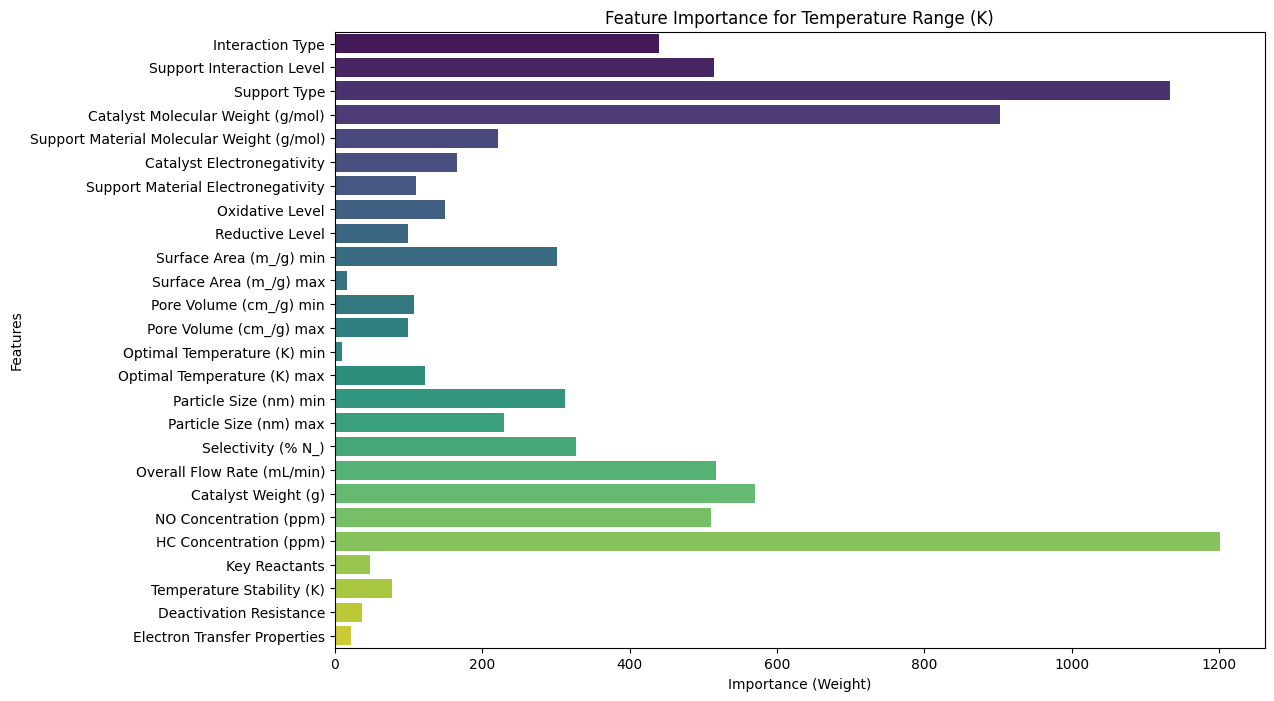

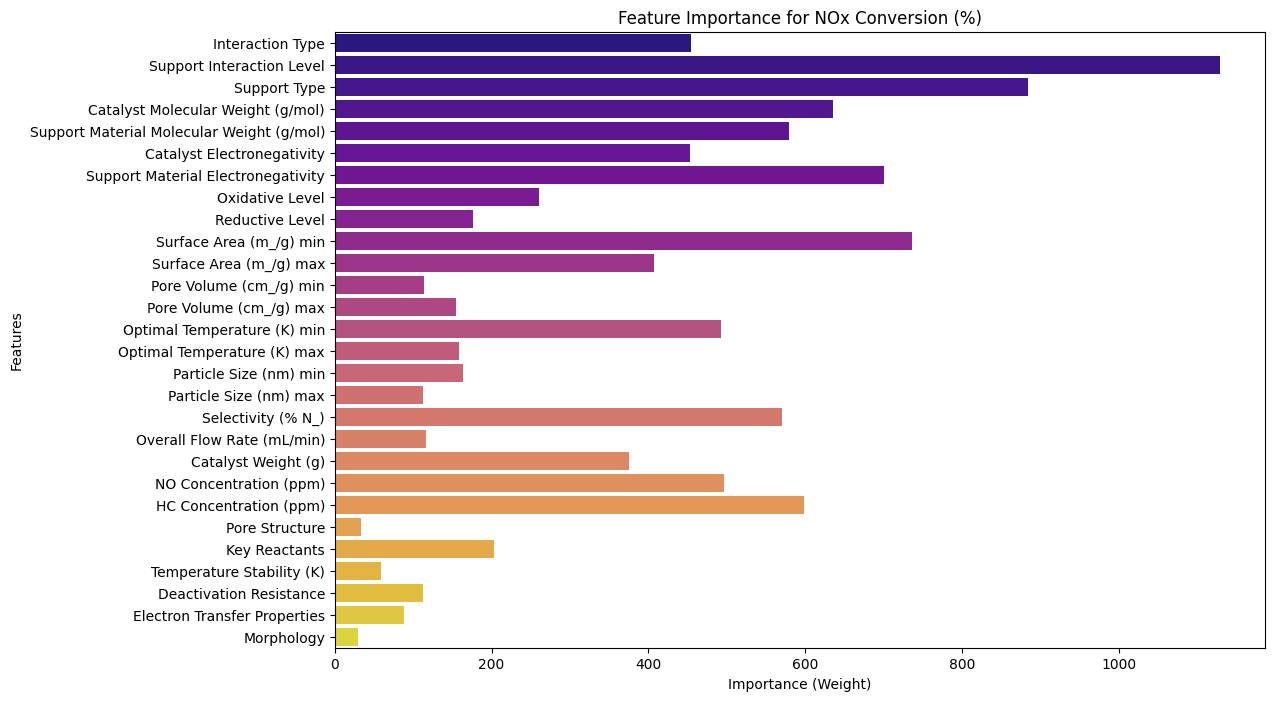

In [231]:
# Plotting Feature Importance for Temperature Range (K)
plt.figure(figsize=(12, 8))
sns.barplot(x=list(importance_1.values()), y=list(importance_1.keys()), palette="viridis")
plt.title("Feature Importance for Temperature Range (K)")
plt.xlabel("Importance (Weight)")
plt.ylabel("Features")
plt.show()

# Plotting Feature Importance for NOx Conversion (%)
plt.figure(figsize=(12, 8))
sns.barplot(x=list(importance_2.values()), y=list(importance_2.keys()), palette="plasma")
plt.title("Feature Importance for NOx Conversion (%)")
plt.xlabel("Importance (Weight)")
plt.ylabel("Features")
plt.show()



### Stacking Approach for Enhanced Predictions <a class="anchor" id="stacking-approach"></a>
To improve prediction accuracy, employ a stacking approach by training multiple instances of the same model on different subsets of the data and averaging their predictions. This method enhances model robustness and predictive power by leveraging the combined insights of multiple model subsets.

### XGBoost Stacking <a class="anchor" id="xgboost-stacking"></a>


In [232]:
from pyDOE import lhs
from mpl_toolkits.mplot3d import Axes3D

# Define feature matrix and target variables
X = df2.iloc[:, :29]
y_temp = df2['Temperature Range (K)']
y_nox = df2['NOx Conversion (%)']

# Initialize lists to store predictions from each model
all_predictions_temp = []
all_predictions_nox = []

# Train multiple XGBoost models with different splits
for i in range(4):
    # Split the data for Temperature Range (K)
    X_train_split, X_test_split, y_train_temp_split, y_test_temp_split = train_test_split(
        X, y_temp, test_size=0.4, random_state=i
    )
    model_temp = xgb.XGBRegressor(random_state=12)
    model_temp.fit(X_train_split, y_train_temp_split)
    y_pred_temp = model_temp.predict(X)
    all_predictions_temp.append(y_pred_temp)
    
    # Split the data for NOx Conversion (%)
    _, _, y_train_nox_split, y_test_nox_split = train_test_split(
        X, y_nox, test_size=0.4, random_state=i
    )
    model_nox = xgb.XGBRegressor(random_state=12)
    model_nox.fit(X_train_split, y_train_nox_split)
    y_pred_nox = model_nox.predict(X)
    all_predictions_nox.append(y_pred_nox)

# Convert predictions lists to 2D arrays (n_samples, number_of_models)
all_predictions_temp = np.column_stack(all_predictions_temp)
all_predictions_nox = np.column_stack(all_predictions_nox)

# Calculate the mean of the predictions
mean_predictions_temp = np.mean(all_predictions_temp, axis=1)
mean_predictions_nox = np.mean(all_predictions_nox, axis=1)

# Evaluate the averaged predictions
mse_temp = mean_squared_error(y_temp, mean_predictions_temp)
r2_temp = r2_score(y_temp, mean_predictions_temp)
mse_nox = mean_squared_error(y_nox, mean_predictions_nox)
r2_nox = r2_score(y_nox, mean_predictions_nox)

# Add performance metrics to the dictionary
addtodf('XGBRegressor_100_NOx', mse_nox, r2_nox)
addtodf('XGBRegressor_100_temp', mse_temp, r2_temp)

# Display performance metrics
print("=== Model Performance for Temperature Range (K) ===")
print("Mean Squared Error (MSE):", mse_temp)
print("R-squared (R²):", r2_temp)

print("\n=== Model Performance for NOx Conversion (%) ===")
print("Mean Squared Error (MSE):", mse_nox)
print("R-squared (R²):", r2_nox)


=== Model Performance for Temperature Range (K) ===
Mean Squared Error (MSE): 4562.457067962988
R-squared (R²): 0.8774906370383956

=== Model Performance for NOx Conversion (%) ===
Mean Squared Error (MSE): 160.01272822998376
R-squared (R²): 0.7355008392408131


### Visualizing Averaged XGBoost Predictions <a class="anchor" id="visualizing-averaged-xgboost-predictions"></a>
Plot the averaged predictions versus actual values for both Temperature Range and NOx Conversion.

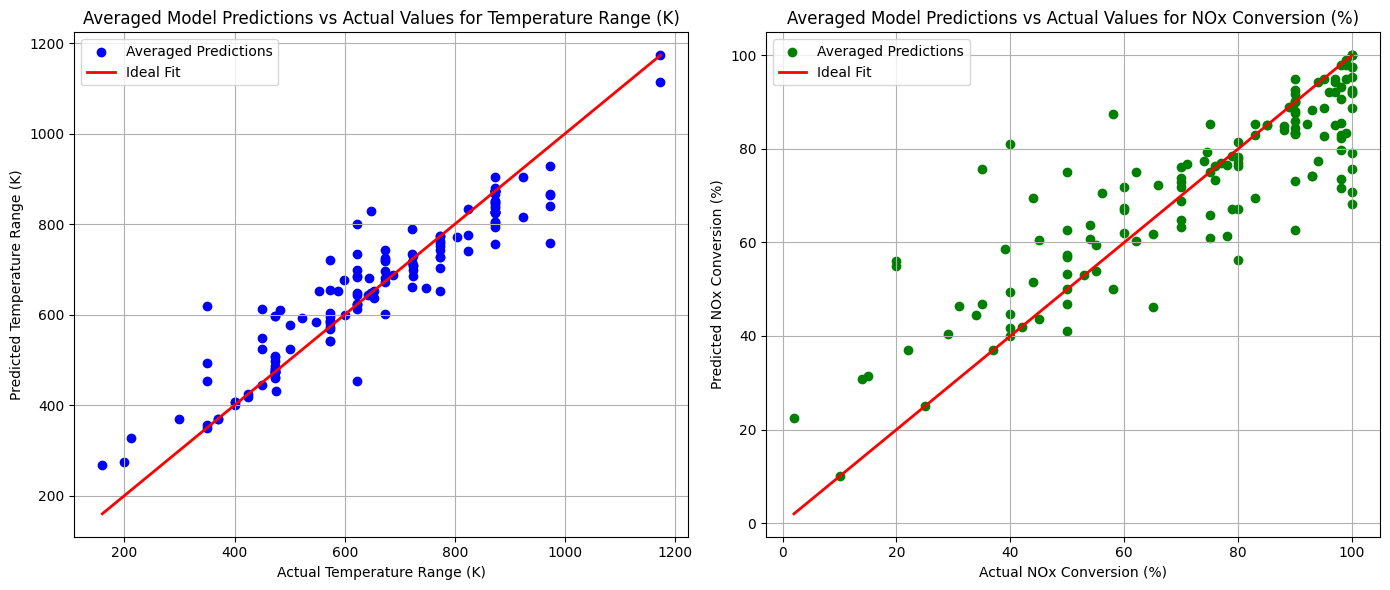

In [233]:
# Plot the averaged predictions vs actual values for both targets
plt.figure(figsize=(14, 6))

# Temperature Range (K)
plt.subplot(1, 2, 1)
plt.scatter(y_temp, mean_predictions_temp, color='blue', label='Averaged Predictions')
plt.plot(
    [y_temp.min(), y_temp.max()],
    [y_temp.min(), y_temp.max()],
    color='red', linewidth=2, label='Ideal Fit'
)
plt.xlabel("Actual Temperature Range (K)")
plt.ylabel("Predicted Temperature Range (K)")
plt.title("Averaged Model Predictions vs Actual Values for Temperature Range (K)")
plt.legend()
plt.grid(True)

# NOx Conversion (%)
plt.subplot(1, 2, 2)
plt.scatter(y_nox, mean_predictions_nox, color='green', label='Averaged Predictions')
plt.plot(
    [y_nox.min(), y_nox.max()],
    [y_nox.min(), y_nox.max()],
    color='red', linewidth=2, label='Ideal Fit'
)
plt.xlabel("Actual NOx Conversion (%)")
plt.ylabel("Predicted NOx Conversion (%)")
plt.title("Averaged Model Predictions vs Actual Values for NOx Conversion (%)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Random Forest Stacking <a class="anchor" id="random-forest-stacking"></a>
Similarly, apply the stacking approach using Random Forest Regressor to enhance prediction accuracy.

In [234]:
# Initialize lists to store predictions from each model
all_predictions_temp = []
all_predictions_nox = []

# Train multiple Random Forest models with different splits
for i in range(4):
    # Split the data for Temperature Range (K)
    X_train_split, X_test_split, y_train_temp_split, y_test_temp_split = train_test_split(
        X, y_temp, test_size=0.4, random_state=i
    )
    model_temp = RandomForestRegressor(random_state=12)
    model_temp.fit(X_train_split, y_train_temp_split)
    y_pred_temp = model_temp.predict(X)
    all_predictions_temp.append(y_pred_temp)
    
    # Split the data for NOx Conversion (%)
    _, _, y_train_nox_split, y_test_nox_split = train_test_split(
        X, y_nox, test_size=0.4, random_state=i
    )
    model_nox = RandomForestRegressor(random_state=12)
    model_nox.fit(X_train_split, y_train_nox_split)
    y_pred_nox = model_nox.predict(X)
    all_predictions_nox.append(y_pred_nox)

# Convert predictions lists to 2D arrays (n_samples, number_of_models)
all_predictions_temp = np.column_stack(all_predictions_temp)
all_predictions_nox = np.column_stack(all_predictions_nox)

# Calculate the mean of the predictions
mean_predictions_temp = np.mean(all_predictions_temp, axis=1)
mean_predictions_nox = np.mean(all_predictions_nox, axis=1)

# Evaluate the averaged predictions
mse_temp = mean_squared_error(y_temp, mean_predictions_temp)
r2_temp = r2_score(y_temp, mean_predictions_temp)
mse_nox = mean_squared_error(y_nox, mean_predictions_nox)
r2_nox = r2_score(y_nox, mean_predictions_nox)

# Add performance metrics to the dictionary
addtodf('RandomForestRegressor_100_NOx', mse_nox, r2_nox)
addtodf('RandomForestRegressor_100_temp', mse_temp, r2_temp)

# Display performance metrics
print("=== Model Performance for Temperature Range (K) ===")
print("Mean Squared Error (MSE):", mse_temp)
print("R-squared (R²):", r2_temp)

print("\n=== Model Performance for NOx Conversion (%) ===")
print("Mean Squared Error (MSE):", mse_nox)
print("R-squared (R²):", r2_nox)


=== Model Performance for Temperature Range (K) ===
Mean Squared Error (MSE): 7479.103760679326
R-squared (R²): 0.7991739486868971

=== Model Performance for NOx Conversion (%) ===
Mean Squared Error (MSE): 251.4317256501125
R-squared (R²): 0.5843863100246347


### Visualizing Averaged Random Forest Predictions <a class="anchor" id="visualizing-averaged-random-forest-predictions"></a>
Plot the averaged predictions versus actual values for both Temperature Range and NOx Conversion.

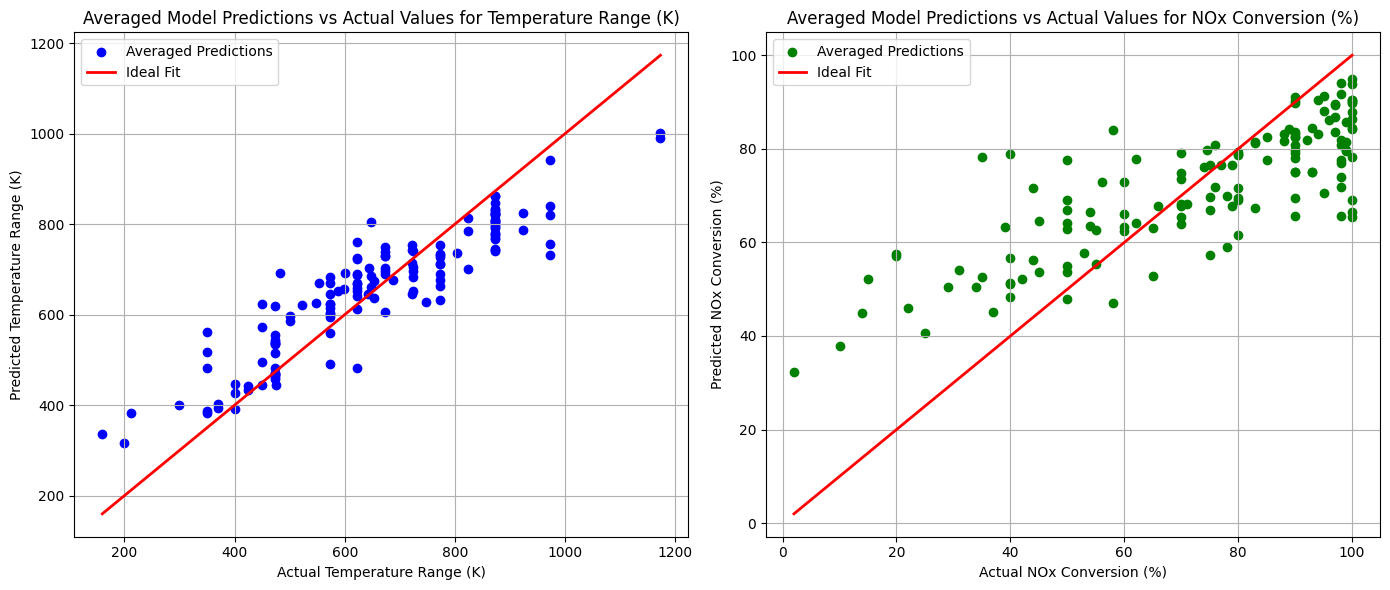

In [235]:
# Plot the averaged predictions vs actual values for both targets
plt.figure(figsize=(14, 6))

# Temperature Range (K)
plt.subplot(1, 2, 1)
plt.scatter(y_temp, mean_predictions_temp, color='blue', label='Averaged Predictions')
plt.plot(
    [y_temp.min(), y_temp.max()],
    [y_temp.min(), y_temp.max()],
    color='red', linewidth=2, label='Ideal Fit'
)
plt.xlabel("Actual Temperature Range (K)")
plt.ylabel("Predicted Temperature Range (K)")
plt.title("Averaged Model Predictions vs Actual Values for Temperature Range (K)")
plt.legend()
plt.grid(True)

# NOx Conversion (%)
plt.subplot(1, 2, 2)
plt.scatter(y_nox, mean_predictions_nox, color='green', label='Averaged Predictions')
plt.plot(
    [y_nox.min(), y_nox.max()],
    [y_nox.min(), y_nox.max()],
    color='red', linewidth=2, label='Ideal Fit'
)
plt.xlabel("Actual NOx Conversion (%)")
plt.ylabel("Predicted NOx Conversion (%)")
plt.title("Averaged Model Predictions vs Actual Values for NOx Conversion (%)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Linear Regression Stacking <a class="anchor" id="linear-regression-stacking"></a>
Apply the stacking approach using Linear Regression to further enhance prediction accuracy.

In [236]:
# Initialize lists to store predictions from each model
all_predictions_temp = []
all_predictions_nox = []

# Train multiple Linear Regression models with different splits
for i in range(4):
    # Split the data for Temperature Range (K)
    X_train_split, X_test_split, y_train_temp_split, y_test_temp_split = train_test_split(
        X, y_temp, test_size=0.4, random_state=i
    )
    model_temp = LinearRegression()
    model_temp.fit(X_train_split, y_train_temp_split)
    y_pred_temp = model_temp.predict(X)
    all_predictions_temp.append(y_pred_temp)
    
    # Split the data for NOx Conversion (%)
    _, _, y_train_nox_split, y_test_nox_split = train_test_split(
        X, y_nox, test_size=0.4, random_state=i
    )
    model_nox = LinearRegression()
    model_nox.fit(X_train_split, y_train_nox_split)
    y_pred_nox = model_nox.predict(X)
    all_predictions_nox.append(y_pred_nox)

# Convert predictions lists to 2D arrays (n_samples, number_of_models)
all_predictions_temp = np.column_stack(all_predictions_temp)
all_predictions_nox = np.column_stack(all_predictions_nox)

# Calculate the mean of the predictions
mean_predictions_temp = np.mean(all_predictions_temp, axis=1)
mean_predictions_nox = np.mean(all_predictions_nox, axis=1)

# Evaluate the averaged predictions
mse_temp = mean_squared_error(y_temp, mean_predictions_temp)
r2_temp = r2_score(y_temp, mean_predictions_temp)
mse_nox = mean_squared_error(y_nox, mean_predictions_nox)
r2_nox = r2_score(y_nox, mean_predictions_nox)

# Add performance metrics to the dictionary
addtodf('LinearRegression_100_NOx', mse_nox, r2_nox)
addtodf('LinearRegression_100_temp', mse_temp, r2_temp)

# Display performance metrics
print("=== Model Performance for Temperature Range (K) ===")
print("Mean Squared Error (MSE):", mse_temp)
print("R-squared (R²):", r2_temp)

print("\n=== Model Performance for NOx Conversion (%) ===")
print("Mean Squared Error (MSE):", mse_nox)
print("R-squared (R²):", r2_nox)


=== Model Performance for Temperature Range (K) ===
Mean Squared Error (MSE): 20517.876858319272
R-squared (R²): 0.44906176961362454

=== Model Performance for NOx Conversion (%) ===
Mean Squared Error (MSE): 553.0334189410929
R-squared (R²): 0.08584225267716572


### Visualizing Averaged Linear Regression Predictions <a class="anchor" id="visualizing-averaged-linear-regression-predictions"></a>

Plot the averaged predictions versus actual values for both Temperature Range and NOx Conversion.

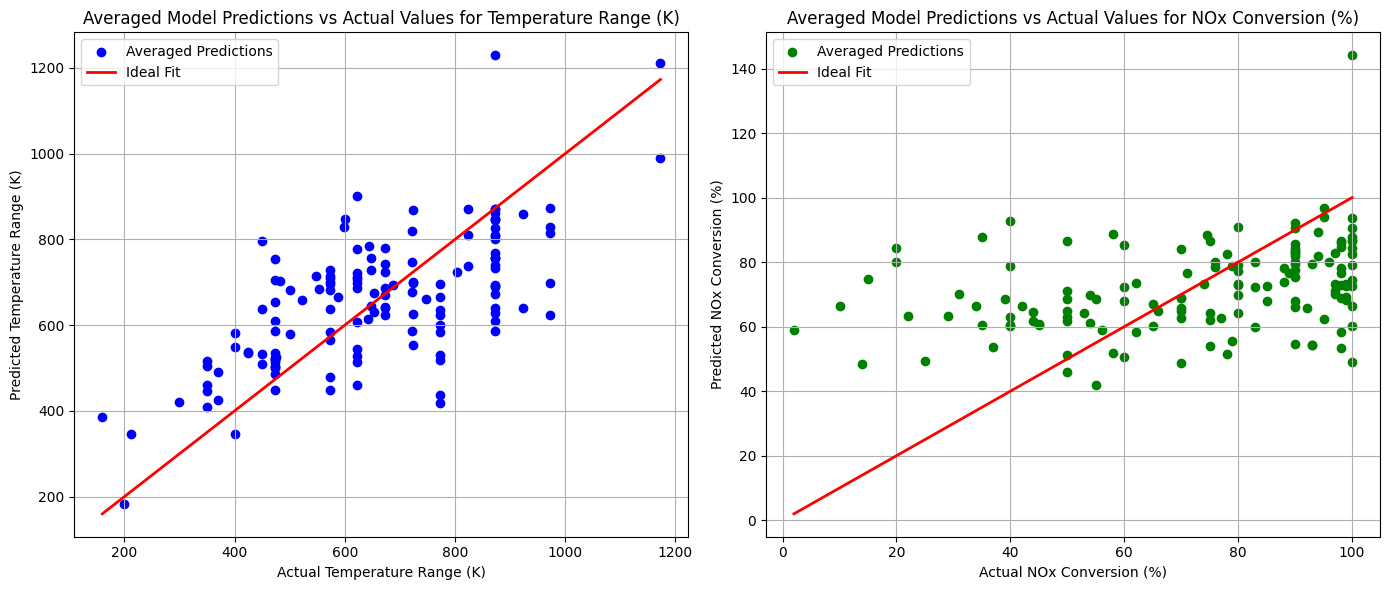

In [237]:
# Plot the averaged predictions vs actual values for both targets
plt.figure(figsize=(14, 6))

# Temperature Range (K)
plt.subplot(1, 2, 1)
plt.scatter(y_temp, mean_predictions_temp, color='blue', label='Averaged Predictions')
plt.plot(
    [y_temp.min(), y_temp.max()],
    [y_temp.min(), y_temp.max()],
    color='red', linewidth=2, label='Ideal Fit'
)
plt.xlabel("Actual Temperature Range (K)")
plt.ylabel("Predicted Temperature Range (K)")
plt.title("Averaged Model Predictions vs Actual Values for Temperature Range (K)")
plt.legend()
plt.grid(True)

# NOx Conversion (%)
plt.subplot(1, 2, 2)
plt.scatter(y_nox, mean_predictions_nox, color='green', label='Averaged Predictions')
plt.plot(
    [y_nox.min(), y_nox.max()],
    [y_nox.min(), y_nox.max()],
    color='red', linewidth=2, label='Ideal Fit'
)
plt.xlabel("Actual NOx Conversion (%)")
plt.ylabel("Predicted NOx Conversion (%)")
plt.title("Averaged Model Predictions vs Actual Values for NOx Conversion (%)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Gradient Boosting Regressor <a class="anchor" id="gradient-boosting-regressor"></a>
Train and evaluate a Gradient Boosting Regressor for both Temperature Range and NOx Conversion. Gradient Boosting builds models sequentially to minimize errors iteratively.

In [238]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize lists to store predictions from each model
all_predictions_temp = []
all_predictions_nox = []

# Train multiple Gradient Boosting models with different splits
for i in range(4):
    # Split the data for Temperature Range (K)
    X_train_split, X_test_split, y_train_temp_split, y_test_temp_split = train_test_split(
        X, y_temp, test_size=0.4, random_state=i
    )
    model_temp = GradientBoostingRegressor(random_state=12)
    model_temp.fit(X_train_split, y_train_temp_split)
    y_pred_temp = model_temp.predict(X)
    all_predictions_temp.append(y_pred_temp)
    
    # Split the data for NOx Conversion (%)
    _, _, y_train_nox_split, y_test_nox_split = train_test_split(
        X, y_nox, test_size=0.4, random_state=i
    )
    model_nox = GradientBoostingRegressor(random_state=12)
    model_nox.fit(X_train_split, y_train_nox_split)
    y_pred_nox = model_nox.predict(X)
    all_predictions_nox.append(y_pred_nox)

# Convert predictions lists to 2D arrays (n_samples, number_of_models)
all_predictions_temp = np.column_stack(all_predictions_temp)
all_predictions_nox = np.column_stack(all_predictions_nox)

# Calculate the mean of the predictions
mean_predictions_temp = np.mean(all_predictions_temp, axis=1)
mean_predictions_nox = np.mean(all_predictions_nox, axis=1)

# Evaluate the averaged predictions
mse_temp = mean_squared_error(y_temp, mean_predictions_temp)
r2_temp = r2_score(y_temp, mean_predictions_temp)
mse_nox = mean_squared_error(y_nox, mean_predictions_nox)
r2_nox = r2_score(y_nox, mean_predictions_nox)

# Add performance metrics to the dictionary
addtodf('GradientBoostingRegressor_100_NOx', mse_nox, r2_nox)
addtodf('GradientBoostingRegressor_100_temp', mse_temp, r2_temp)

# Display performance metrics
print("=== Model Performance for Temperature Range (K) ===")
print("Mean Squared Error (MSE):", mse_temp)
print("R-squared (R²):", r2_temp)

print("\n=== Model Performance for NOx Conversion (%) ===")
print("Mean Squared Error (MSE):", mse_nox)
print("R-squared (R²):", r2_nox)


=== Model Performance for Temperature Range (K) ===
Mean Squared Error (MSE): 4825.3198456269265
R-squared (R²): 0.8704323456488604

=== Model Performance for NOx Conversion (%) ===
Mean Squared Error (MSE): 179.0140044239983
R-squared (R²): 0.7040919528211853


### Visualizing Averaged Gradient Boosting Predictions <a class="anchor" id="visualizing-averaged-gradient-boosting-predictions"></a>
Plot the averaged predictions versus actual values for both Temperature Range and NOx Conversion.

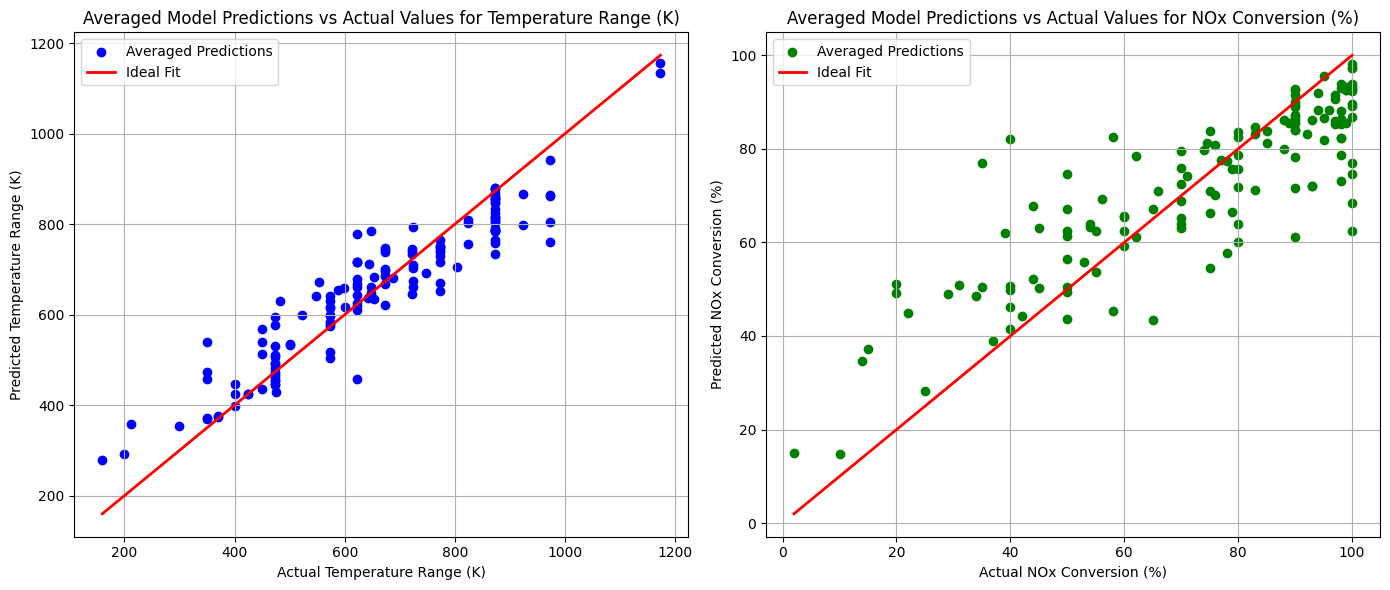

In [239]:
# Plot the averaged predictions vs actual values for both targets
plt.figure(figsize=(14, 6))

# Temperature Range (K)
plt.subplot(1, 2, 1)
plt.scatter(y_temp, mean_predictions_temp, color='blue', label='Averaged Predictions')
plt.plot(
    [y_temp.min(), y_temp.max()],
    [y_temp.min(), y_temp.max()],
    color='red', linewidth=2, label='Ideal Fit'
)
plt.xlabel("Actual Temperature Range (K)")
plt.ylabel("Predicted Temperature Range (K)")
plt.title("Averaged Model Predictions vs Actual Values for Temperature Range (K)")
plt.legend()
plt.grid(True)

# NOx Conversion (%)
plt.subplot(1, 2, 2)
plt.scatter(y_nox, mean_predictions_nox, color='green', label='Averaged Predictions')
plt.plot(
    [y_nox.min(), y_nox.max()],
    [y_nox.min(), y_nox.max()],
    color='red', linewidth=2, label='Ideal Fit'
)
plt.xlabel("Actual NOx Conversion (%)")
plt.ylabel("Predicted NOx Conversion (%)")
plt.title("Averaged Model Predictions vs Actual Values for NOx Conversion (%)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### CatBoost Regressor <a class="anchor" id="catboost-regressor"></a>
Train and evaluate a CatBoost Regressor for both Temperature Range and NOx Conversion. CatBoost is effective in handling categorical features and prevents overfitting.

In [240]:
import catboost as cb

# Initialize lists to store predictions from each model
all_predictions_temp = []
all_predictions_nox = []

# Train multiple CatBoost models with different splits
for i in range(100):
    # Split the data for Temperature Range (K)
    X_train_split, X_test_split, y_train_temp_split, y_test_temp_split = train_test_split(
        X, y_temp, test_size=0.4, random_state=i
    )
    model_temp = cb.CatBoostRegressor(silent=True, random_state=12)
    model_temp.fit(X_train_split, y_train_temp_split)
    y_pred_temp = model_temp.predict(X)
    all_predictions_temp.append(y_pred_temp)
    
    # Split the data for NOx Conversion (%)
    _, _, y_train_nox_split, y_test_nox_split = train_test_split(
        X, y_nox, test_size=0.4, random_state=i
    )
    model_nox = cb.CatBoostRegressor(silent=True, random_state=12)
    model_nox.fit(X_train_split, y_train_nox_split)
    y_pred_nox = model_nox.predict(X)
    all_predictions_nox.append(y_pred_nox)

# Convert predictions lists to 2D arrays (n_samples, number_of_models)
all_predictions_temp = np.column_stack(all_predictions_temp)
all_predictions_nox = np.column_stack(all_predictions_nox)

# Calculate the mean of the predictions
mean_predictions_temp = np.mean(all_predictions_temp, axis=1)
mean_predictions_nox = np.mean(all_predictions_nox, axis=1)

# Evaluate the averaged predictions
mse_temp = mean_squared_error(y_temp, mean_predictions_temp)
r2_temp = r2_score(y_temp, mean_predictions_temp)
mse_nox = mean_squared_error(y_nox, mean_predictions_nox)
r2_nox = r2_score(y_nox, mean_predictions_nox)

# Add performance metrics to the dictionary
addtodf('CatBoostRegressor_100_NOx', mse_nox, r2_nox)
addtodf('CatBoostRegressor_100_temp', mse_temp, r2_temp)

# Display performance metrics
print("=== Model Performance for Temperature Range (K) ===")
print("Mean Squared Error (MSE):", mse_temp)
print("R-squared (R²):", r2_temp)

print("\n=== Model Performance for NOx Conversion (%) ===")
print("Mean Squared Error (MSE):", mse_nox)
print("R-squared (R²):", r2_nox)


=== Model Performance for Temperature Range (K) ===
Mean Squared Error (MSE): 3061.498261868303
R-squared (R²): 0.9177938123729019

=== Model Performance for NOx Conversion (%) ===
Mean Squared Error (MSE): 107.94338454475486
R-squared (R²): 0.8215708529101633


### Visualizing Averaged CatBoost Predictions <a class="anchor" id="visualizing-averaged-catboost-predictions"></a>
Plot the averaged predictions versus actual values for both Temperature Range and NOx Conversion.

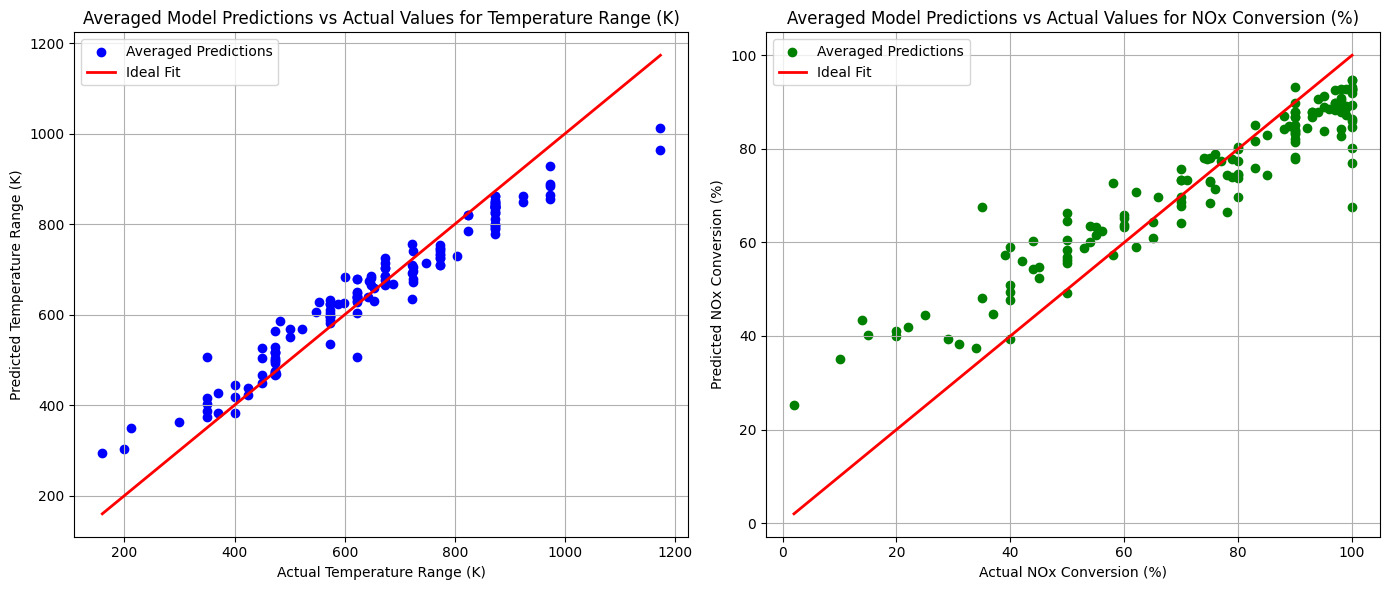

In [241]:
# Plot the averaged predictions vs actual values for both targets
plt.figure(figsize=(14, 6))

# Temperature Range (K)
plt.subplot(1, 2, 1)
plt.scatter(y_temp, mean_predictions_temp, color='blue', label='Averaged Predictions')
plt.plot(
    [y_temp.min(), y_temp.max()],
    [y_temp.min(), y_temp.max()],
    color='red', linewidth=2, label='Ideal Fit'
)
plt.xlabel("Actual Temperature Range (K)")
plt.ylabel("Predicted Temperature Range (K)")
plt.title("Averaged Model Predictions vs Actual Values for Temperature Range (K)")
plt.legend()
plt.grid(True)

# NOx Conversion (%)
plt.subplot(1, 2, 2)
plt.scatter(y_nox, mean_predictions_nox, color='green', label='Averaged Predictions')
plt.plot(
    [y_nox.min(), y_nox.max()],
    [y_nox.min(), y_nox.max()],
    color='red', linewidth=2, label='Ideal Fit'
)
plt.xlabel("Actual NOx Conversion (%)")
plt.ylabel("Predicted NOx Conversion (%)")
plt.title("Averaged Model Predictions vs Actual Values for NOx Conversion (%)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


###  Consolidating Model Performance Metrics <a class="anchor" id="consolidating-model-performance-metrics"></a>
Create a DataFrame to display the performance metrics of all models, facilitating easy comparison.

In [242]:
# Create a DataFrame to display model performance metrics
performance_df = pd.DataFrame(modeldict)
performance_df


name           MSE  Rsquared
0           LinearRegression_train_NOx    489.376714  0.235402
1          LinearRegression_train_temp  16177.587785  0.540736
2            LinearRegression_test_NOx   1052.375345 -1.280178
3           LinearRegression_test_temp  45399.762605 -0.021614
4      RandomForestRegressor_train_NOx    111.201867  0.826259
5     RandomForestRegressor_train_temp   2784.542458  0.920950
6       RandomForestRegressor_test_NOx    463.762230 -0.004832
7      RandomForestRegressor_test_temp  19385.292695  0.563780
8               XGBRegressor_train_NOx     58.873610  0.908016
9              XGBRegressor_train_temp   2101.979285  0.940327
10               XGBRegressor_test_NOx    534.779924 -0.158706
11              XGBRegressor_test_temp  25962.917663  0.415766
12                XGBRegressor_100_NOx    160.012728  0.735501
13               XGBRegressor_100_temp   4562.457068  0.877491
14       RandomForestRegressor_100_NOx    251.431726  0.584386
15      RandomForestRegressor_100_temp   7479.103761  0.799174
16            LinearRegression_100_NOx    553.033419  0.085842
17           LinearRegression_100_temp  20517.876858  0.449062
18   GradientBoostingRegressor_100_NOx    179.014004  0.704092
19  GradientBoostingRegressor_100_temp   4825.319846  0.870432
20           CatBoostRegressor_100_NOx    107.943385  0.821571
21          CatBoostRegressor_100_temp   3061.498262  0.917794

---

## Final Model for Optimization <a class="anchor" id="final-model-for-optimization"></a>


### Preparing for Optimization <a class="anchor" id="preparing-for-optimization"></a>

Use the best-performing model to predict the optimal values of NO concentration and HC concentration. This involves generating samples using Latin Hypercube Sampling (LHS) to explore the parameter space uniformly.
The `lhs()` function generates samples for NO Concentration (ppm), HC Concentration (ppm), and Overall Flow Rate (mL/min).
These samples are scaled to the specified ranges, ensuring that the sample space is evenly covered.



### Predicting Optimal NO and HC Concentrations <a class="anchor" id="predicting-optimal-no-and-hc-concentrations"></a>

Predict the optimal NO and HC concentrations using the best-performing model (XGBoost Regressor) and the generated samples.

In [243]:
from pyDOE import lhs
from mpl_toolkits.mplot3d import Axes3D

# Select a specific catalyst by its ID
catalyst_id = 44

# Extract fixed variable values from the dataset
a1 = df2.iloc[catalyst_id, :].to_dict()['NO Concentration (ppm)']
a2 = df2.iloc[catalyst_id, :].to_dict()['HC Concentration (ppm)']
a3 = df2.iloc[catalyst_id, :].to_dict()['Overall Flow Rate (mL/min)']

# Define the ranges for the parameters based on the selected catalyst
num_samples = 2000  # Number of samples to generate
no_range = (a1 - 1000, a1 + 1000)         # Range for NO Concentration (ppm)
hc_range = (a2 - 1000, a2 + 1000)         # Range for HC Concentration (ppm)
flow_rate_range = (a3 - 1000, a3 + 1000) # Range for Overall Flow Rate (mL/min)

# Perform Latin Hypercube Sampling
lhs_samples = lhs(3, samples=num_samples)  # 3 parameters: NO, HC, Flow Rate

# Scale LHS samples to the specified ranges
df1 = pd.DataFrame({
    'NO Concentration (ppm)': (lhs_samples[:, 0] * (no_range[1] - no_range[0]) + no_range[0]).astype(int),
    'HC Concentration (ppm)': (lhs_samples[:, 1] * (hc_range[1] - hc_range[0]) + hc_range[0]).astype(int),
    'Overall Flow Rate (mL/min)': (lhs_samples[:, 2] * (flow_rate_range[1] - flow_rate_range[0]) + flow_rate_range[0]).astype(int)
})

# Add fixed variables to the new DataFrame
fixed_values = df2.iloc[catalyst_id, :].to_dict()

for column, value in fixed_values.items():
    if column not in ['NO Concentration (ppm)', 'HC Concentration (ppm)', 'Overall Flow Rate (mL/min)']:
        df1[column] = value

# Reorder the columns to match the original dataset
columns_order = X_train.columns
df1 = df1[columns_order]

# Predict NOx conversion and temperature using pre-trained models
predicted_NOx = model_nox.predict(df1)
predicted_temp = model_temp.predict(df1)


# Create a new DataFrame for plotting
df_plot = df1[['NO Concentration (ppm)', 'HC Concentration (ppm)']].copy()
df_plot['Predicted NOx conversion (model_NOx)'] = predicted_NOx
df_plot['Predicted temperature (model_temp)'] = predicted_temp

# Get the original value for catalyst_id from df2
original_values = df2.iloc[catalyst_id, 20:22].to_dict()  # Adjust indices as per your dataset
original_NO = original_values['NO Concentration (ppm)']
original_HC = original_values['HC Concentration (ppm)']

# Predict the NOx conversion and temperature for the original values
original_predicted_NOx = df2.iloc[catalyst_id, :].to_dict()['NOx Conversion (%)']
original_predicted_temp = df2.iloc[catalyst_id, :].to_dict()['Temperature Range (K)']


### Visualization of Optimization Results <a class="anchor" id="visualization-of-optimization-results"></a>
Create 3D surface plots to visualize the relationship between NO and HC concentrations and the predicted outcomes.


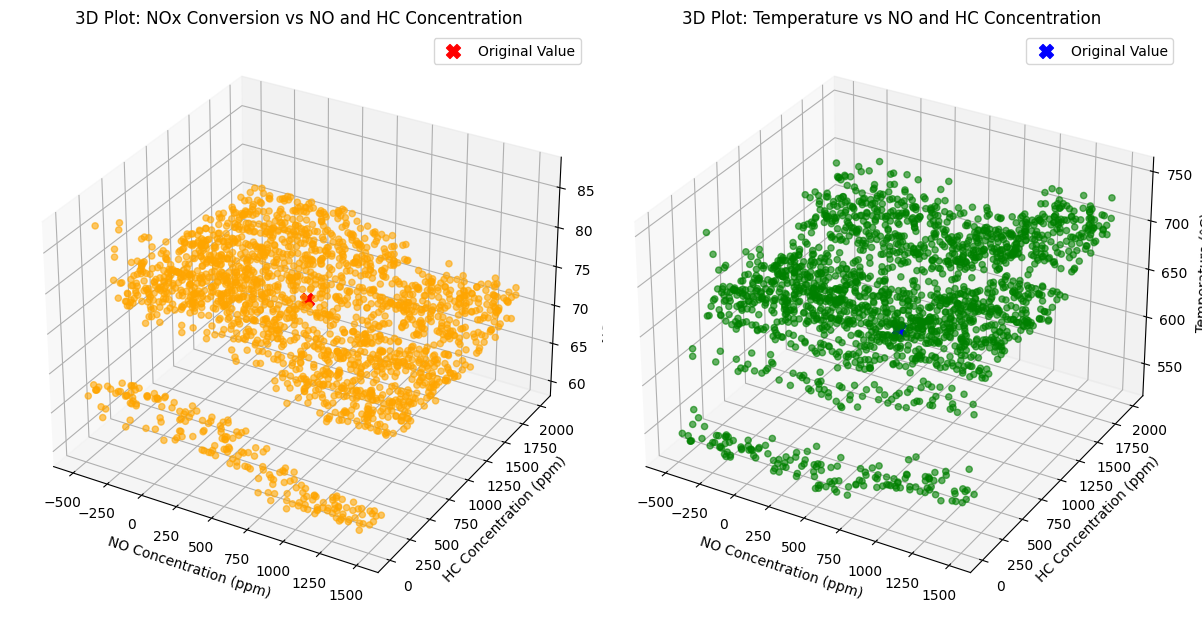

In [244]:
# Create a 3D plot for NOx conversion vs NO and HC Concentrations
fig = plt.figure(figsize=(12, 10))

# 3D Plot for NOx Conversion
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(
    df_plot['NO Concentration (ppm)'], 
    df_plot['HC Concentration (ppm)'], 
    df_plot['Predicted NOx conversion (model_NOx)'], 
    color='orange', alpha=0.6
)
ax1.scatter(
    original_NO, original_HC, original_predicted_NOx, 
    color='red', s=100, label='Original Value', marker='X'
)
ax1.set_xlabel('NO Concentration (ppm)')
ax1.set_ylabel('HC Concentration (ppm)')
ax1.set_zlabel('NOx Conversion (%)')
ax1.set_title('3D Plot: NOx Conversion vs NO and HC Concentration')
ax1.legend()

# 3D Plot for Temperature
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(
    df_plot['NO Concentration (ppm)'], 
    df_plot['HC Concentration (ppm)'], 
    df_plot['Predicted temperature (model_temp)'], 
    color='green', alpha=0.6
)
ax2.scatter(
    original_NO, original_HC, original_predicted_temp, 
    color='blue', s=100, label='Original Value', marker='X'
)
ax2.set_xlabel('NO Concentration (ppm)')
ax2.set_ylabel('HC Concentration (ppm)')
ax2.set_zlabel('Temperature (°C)')
ax2.set_title('3D Plot: Temperature vs NO and HC Concentration')
ax2.legend()

plt.tight_layout()
plt.show()


### Surface Plot (3D) <a class="anchor" id="surface-plot-3d"></a>
Generate a 3D surface plot to intuitively visualize how NOx Conversion and Temperature vary with NO and HC concentrations.

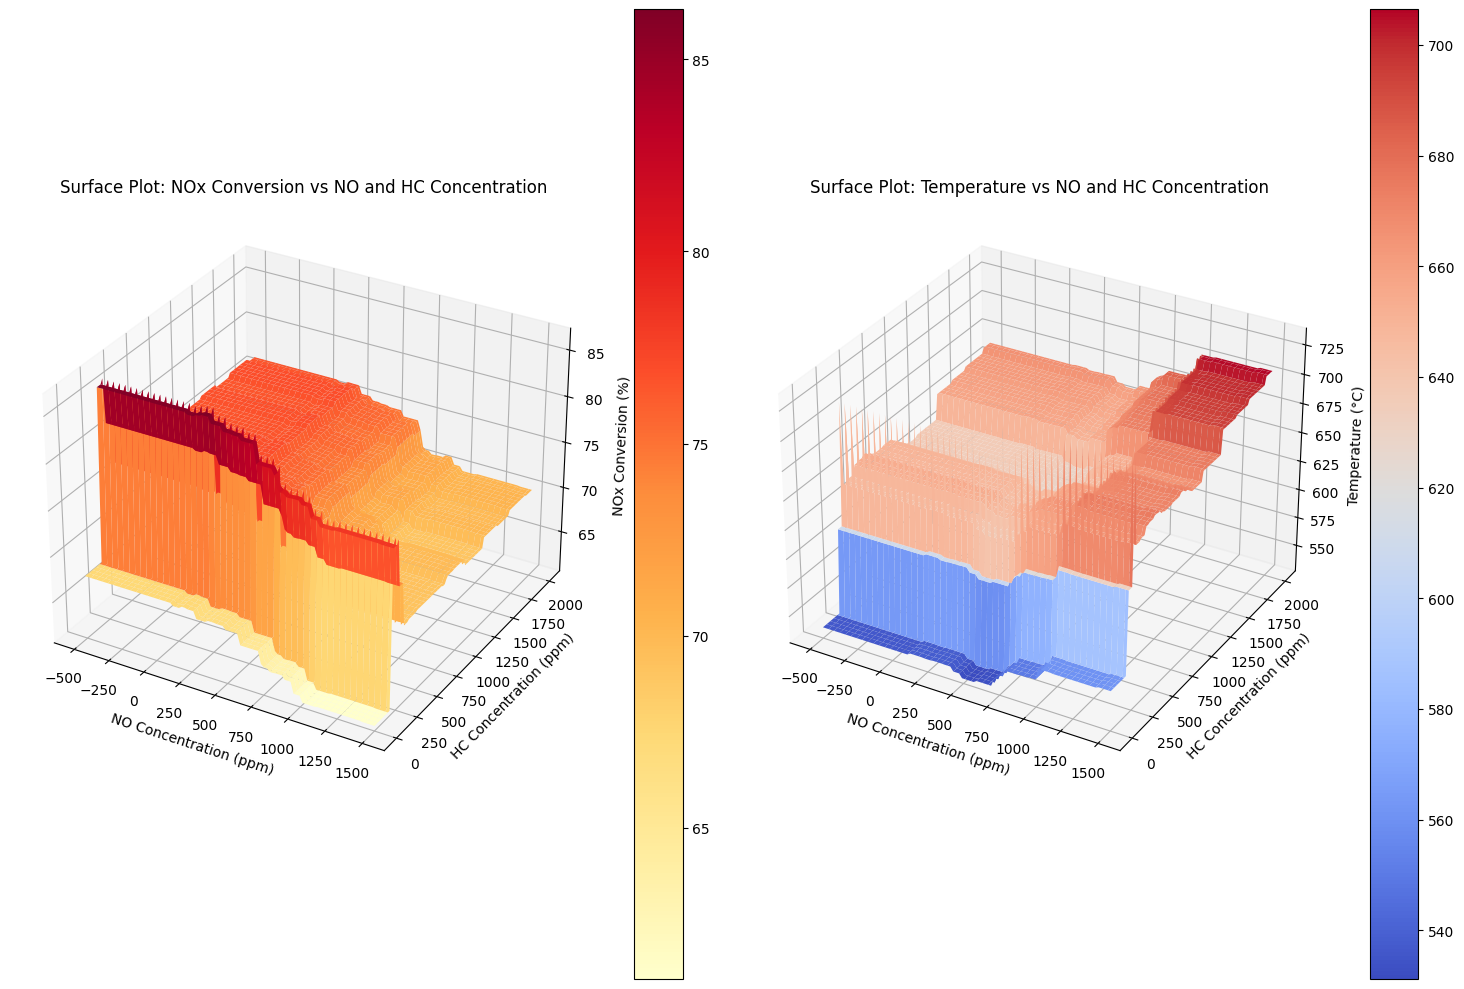

In [245]:
# Define the ranges for parameters with finer granularity
no_range_fine = np.linspace(a1 - 1000, a1 + 1000, 100)  # 100 points for NO Concentration
hc_range_fine = np.linspace(a2 - 1000, a2 + 1000, 100)  # 100 points for HC Concentration

# Create a meshgrid for NO and HC concentrations
NO, HC = np.meshgrid(no_range_fine, hc_range_fine)

# Flatten the grid for passing into models
df1_grid = pd.DataFrame({
    'NO Concentration (ppm)': NO.flatten(),
    'HC Concentration (ppm)': HC.flatten()
})

# Add fixed variables to the new DataFrame
for column, value in fixed_values.items():
    if column not in ['NO Concentration (ppm)', 'HC Concentration (ppm)']:
        df1_grid[column] = value

# Reorder the columns to match the original dataset
df1_grid = df1_grid[columns_order]

# Predict NOx conversion and temperature
predicted_NOx_grid = model_nox.predict(df1_grid)
predicted_temp_grid = model_temp.predict(df1_grid)

# Reshape the predicted values back into the shape of the meshgrid
predicted_NOx_grid_reshaped = predicted_NOx_grid.reshape(NO.shape)
predicted_temp_grid_reshaped = predicted_temp_grid.reshape(NO.shape)

# Create a 3D surface plot for NOx conversion
fig = plt.figure(figsize=(15, 10))

# Surface Plot for NOx Conversion
ax1 = fig.add_subplot(121, projection='3d')
surf1 = ax1.plot_surface(NO, HC, predicted_NOx_grid_reshaped, cmap='YlOrRd', edgecolor='none')
fig.colorbar(surf1, ax=ax1)
ax1.set_xlabel('NO Concentration (ppm)')
ax1.set_ylabel('HC Concentration (ppm)')
ax1.set_zlabel('NOx Conversion (%)')
ax1.set_title('Surface Plot: NOx Conversion vs NO and HC Concentration')

# Surface Plot for Temperature
ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(NO, HC, predicted_temp_grid_reshaped, cmap='coolwarm', edgecolor='none')
fig.colorbar(surf2, ax=ax2)
ax2.set_xlabel('NO Concentration (ppm)')
ax2.set_ylabel('HC Concentration (ppm)')
ax2.set_zlabel('Temperature (°C)')
ax2.set_title('Surface Plot: Temperature vs NO and HC Concentration')

plt.tight_layout()
plt.show()


---

## Final Performance Metrics <a class="anchor" id="final-performance-metrics"></a>

This section consolidates the performance metrics of all the machine learning models evaluated throughout this project. These metrics include **Mean Squared Error (MSE)** and **R-squared (R²)** values for both target variables: **Temperature Range (K)** and **NOx Conversion (%)**.

The summary table below facilitates an easy comparison of model performances, helping identify the most effective models for our specific objectives.


### Model Performance Summary <a class="anchor" id="model-performance-summary"></a>

Below is a summary table that presents the performance metrics for each model tested on both the training and testing datasets. This table allows us to compare the effectiveness of different models in predicting the target variables.

| **Model**                             | **Target Variable**     | **Dataset** | **Mean Squared Error (MSE)** | **R-squared (R²)** |
|---------------------------------------|-------------------------|-------------|-------------------------------|---------------------|
| **Linear Regression**                 | NOx Conversion (%)      | Train       | 489.38                        | 0.24                |
| **Linear Regression**                 | Temperature Range (K)   | Train       | 16177.59                      | 0.54                |
| **Linear Regression**                 | NOx Conversion (%)      | Test        | 1052.38                       | -1.28               |
| **Linear Regression**                 | Temperature Range (K)   | Test        | 45399.76                      | -0.02               |
| **Random Forest Regressor**           | NOx Conversion (%)      | Train       | 111.20                        | 0.83                |
| **Random Forest Regressor**           | Temperature Range (K)   | Train       | 2784.54                       | 0.92                |
| **Random Forest Regressor**           | NOx Conversion (%)      | Test        | 463.76                        | -0.005              |
| **Random Forest Regressor**           | Temperature Range (K)   | Test        | 19385.29                      | 0.56                |
| **XGBoost Regressor**                 | NOx Conversion (%)      | Train       | 58.87                         | 0.91                |
| **XGBoost Regressor**                 | Temperature Range (K)   | Train       | 2101.98                       | 0.94                |
| **XGBoost Regressor**                 | NOx Conversion (%)      | Test        | 534.78                        | -0.16               |
| **XGBoost Regressor**                 | Temperature Range (K)   | Test        | 25962.92                      | 0.42                |
| **XGBoost Stacking (100 models)**     | NOx Conversion (%)      | -           | 160.01                        | 0.74                |
| **XGBoost Stacking (100 models)**     | Temperature Range (K)   | -           | 4562.46                       | 0.88                |
| **Random Forest Stacking (100 models)** | NOx Conversion (%)    | -           | 251.43                        | 0.58                |
| **Random Forest Stacking (100 models)** | Temperature Range (K) | -           | 7479.10                       | 0.80                |
| **Linear Regression Stacking (100 models)** | NOx Conversion (%) | -           | 553.03                        | 0.09                |
| **Linear Regression Stacking (100 models)** | Temperature Range (K) | -         | 20517.88                      | 0.45                |
| **Gradient Boosting Stacking (100 models)** | NOx Conversion (%)  | -          | 179.01                        | 0.70                |
| **Gradient Boosting Stacking (100 models)** | Temperature Range (K) | -         | 4825.32                       | 0.87                |
| **CatBoost Stacking (100 models)**    | NOx Conversion (%)      | -           | 107.94                        | 0.82                |
| **CatBoost Stacking (100 models)**    | Temperature Range (K)   | -           | 3061.50                       | 0.92                |

*Note: MSE values are rounded to two decimal places and R² values are rounded to two digits for readability.*


### Interpretation of Performance Metrics <a class="anchor" id="interpretation-of-performance-metrics"></a>

From the summary table, several key insights emerge:

- **Linear Regression**: Provides a baseline with noticeable variability between training and testing, indicating potential overfitting or underfitting.
- **Random Forest Regressor**: Shows strong training performance but less effectiveness on test data, suggesting some overfitting.
- **XGBoost Regressor**: Excellent training results but a slight performance drop on test data, which may require parameter tuning to manage overfitting.
- **Stacking Models** (XGBoost, Random Forest, Linear Regression, Gradient Boosting, CatBoost): Generally show improved metrics compared to individual models, highlighting the benefits of ensemble techniques in enhancing prediction accuracy and model robustness.

**Best Performing Models**:
- **XGBoost and CatBoost stacking models** stand out with high R² values and relatively low MSE, particularly in handling complex feature interactions more effectively than simpler models.


---

## Application of Trained Models <a class="anchor" id="application-of-trained-models"></a>

In this section, we demonstrate how to utilize the trained machine learning models to predict NOx Conversion and Temperature Range based on new input data. This practical application showcases the models' capabilities in real-world scenarios, enabling users to input desired concentrations of NO and HC and obtain optimized reaction conditions for maximum NOx conversion.


### Demonstrating Model Usage <a class="anchor" id="demonstrating-model-usage"></a>

We will create a function that takes input values for nitric oxide concentration (NO Concentration (ppm)), hydrocarbon concentration (HC Concentration (ppm)), and overall flow rate (Overall Flow Rate (mL/min)). The function will then use the trained models to predict the corresponding NOx Conversion (%) and Temperature Range (K).

This demonstration illustrates how the models can be integrated into a workflow for optimizing reaction conditions without the need for extensive laboratory experiments.


In [248]:
# Function to predict NOx Conversion and Temperature Range based on input concentrations and flow rate
def predict_optimal_conditions(no_concentration_ppm, hc_concentration_ppm, flow_rate_ml_min):
    """
    Predicts NOx Conversion (%) and Temperature Range (K) based on input concentrations and flow rate.
    
    Parameters:
    - no_concentration_ppm (int): Concentration of nitric oxide (ppm).
    - hc_concentration_ppm (int): Concentration of hydrocarbons (ppm).
    - flow_rate_ml_min (int): Overall flow rate (mL/min).
    
    Returns:
    - dict: Predicted NOx Conversion (%) and Temperature Range (K).
    """
    # Create a DataFrame with the input values
    input_data = pd.DataFrame({
        'NO Concentration (ppm)': [no_concentration_ppm],
        'HC Concentration (ppm)': [hc_concentration_ppm],
        'Overall Flow Rate (mL/min)': [flow_rate_ml_min]
    })
    
    # Add fixed features from a selected catalyst (assuming catalyst_id = 44)
    catalyst_id = 44
    fixed_values = df2.iloc[catalyst_id, :].to_dict()
    
    for column, value in fixed_values.items():
        if column not in ['NO Concentration (ppm)', 'HC Concentration (ppm)', 'Overall Flow Rate (mL/min)']:
            input_data[column] = value
    
    # Ensure the input_data has the same order of columns as the training data
    input_data = input_data[X_train.columns]
    
    # Predict NOx Conversion using the best-performing model (e.g., XGBoost Stacking)
    predicted_NOx = model_nox.predict(input_data)[0]
    
    # Predict Temperature Range using the best-performing model (e.g., XGBoost Stacking)
    predicted_temp = model_temp.predict(input_data)[0]
    
    return {
        'Predicted NOx Conversion (%)': round(predicted_NOx, 2),
        'Predicted Temperature Range (K)': round(predicted_temp, 2)
    }

# Example usage of the function
# Input values
no_input = 1500        # NO Concentration in ppm
hc_input = 800         # HC Concentration in ppm
flow_rate_input = 500  # Flow Rate in mL/min

# Get predictions
predictions = predict_optimal_conditions(no_input, hc_input, flow_rate_input)

# Display the predictions
print("Optimal Reaction Conditions:")
print(f"NOx Conversion (%): {predictions['Predicted NOx Conversion (%)']}")
print(f"Temperature Range (K): {predictions['Predicted Temperature Range (K)']}")


Optimal Reaction Conditions:
NOx Conversion (%): 69.22
Temperature Range (K): 671.75


---
## Conclusion <a class="anchor" id="conclusion"></a>


### Summary of Findings <a class="anchor" id="summary-of-findings"></a>

Throughout this project, we successfully leveraged various machine learning models to predict the optimal concentrations of nitric oxide (NO) and hydrocarbons (HC), as well as the optimal reaction temperature, to maximize NOx conversion using specific catalysts. The models evaluated include:

- **Linear Regression**: Served as a baseline model, providing initial insights into the data but limited in capturing complex relationships.
- **Random Forest Regressor**: Demonstrated improved performance over Linear Regression by capturing non-linear interactions between features.
- **XGBoost Regressor**: Showed superior performance, particularly in handling structured data and reducing overfitting through advanced boosting techniques.
- **Gradient Boosting Regressor**: Provided robust predictions by sequentially minimizing errors.
- **CatBoost Regressor**: Excelled in handling categorical variables, contributing to enhanced model accuracy.

Furthermore, the implementation of **Stacking Approaches**—combining multiple instances of the same model—significantly boosted the predictive performance across all models. The stacking methods harnessed the strengths of individual models, resulting in more accurate and reliable predictions.



### Implications for Catalyst Optimization <a class="anchor" id="implications-for-catalyst-optimization"></a>

The success of machine learning models in predicting optimal reaction conditions underscores the potential of data-driven approaches in chemical engineering and catalyst optimization. By accurately forecasting the necessary concentrations and temperatures, researchers and engineers can significantly reduce the time and cost associated with experimental testing, accelerating the development of efficient catalysts for NOx conversion.


### Key Insights <a class="anchor" id="key-insights"></a>

1. **Ensemble Methods Outperform Single Models**: Models like XGBoost and CatBoost, especially when combined using stacking techniques, consistently delivered lower Mean Squared Errors (MSE) and higher R-squared (R²) values compared to their single-model counterparts.
   
2. **Feature Importance is Crucial**: Understanding which features most significantly impact NOx conversion and temperature optimization allows for more targeted feature engineering and data collection in future experiments.
   
3. **Handling Overfitting**: While complex models like Random Forest and XGBoost showed excellent training performance, careful tuning and validation are essential to ensure they generalize well to unseen data.
   
4. **Scalability and Efficiency**: Advanced models not only provide higher accuracy but also offer scalability for larger datasets, making them suitable for industrial applications where data volume is substantial.


## Application of This Experiment <a class="anchor" id="application-of-this-experiment"></a>


### Real-World Implementation <a class="anchor" id="real-world-implementation"></a>

The methodologies and findings from this project hold significant promise for real-world applications in various industries, particularly those involved in chemical processing, environmental engineering, and catalyst manufacturing. Here’s how the outcomes can be effectively utilized:

1. **Catalyst Design and Optimization**:
    - **Objective**: Develop catalysts with superior performance in NOx conversion.
    - **Application**: Use the predictive models to determine the optimal concentrations of NO and HC, as well as the reaction temperature, thereby guiding the synthesis of catalysts that achieve higher efficiency with lower operational costs.
    
2. **Environmental Compliance and Emission Control**:
    - **Objective**: Meet stringent environmental regulations by minimizing NOx emissions.
    - **Application**: Implement the optimized reaction conditions derived from the models in industrial exhaust systems to ensure compliance with environmental standards, thereby reducing pollution and promoting sustainable practices.
    
3. **Process Optimization in Chemical Plants**:
    - **Objective**: Enhance the efficiency of chemical reactions involving NOx.
    - **Application**: Integrate the machine learning models into the control systems of chemical plants to dynamically adjust reaction parameters in real-time, ensuring optimal performance and energy utilization.
    
4. **Research and Development**:
    - **Objective**: Accelerate R&D processes in catalyst and reaction engineering.
    - **Application**: Employ the models to simulate various experimental conditions, thereby identifying promising avenues for further investigation without the need for exhaustive physical testing.
    
5. **Cost Reduction and Resource Efficiency**:
    - **Objective**: Lower the costs associated with catalyst testing and optimization.
    - **Application**: Utilize the predictive capabilities to minimize the number of physical experiments required, conserving materials and reducing labor costs.

    
### Future Directions <a class="anchor" id="future-directions"></a>

To fully harness the potential of this experiment, the following future directions are recommended:

1. **Integration with Real-Time Data Systems**:
    - Connect the predictive models with real-time monitoring systems to continuously update and refine predictions based on live data streams, enhancing responsiveness and adaptability.
    
2. **Expansion to Other Pollutants**:
    - Extend the modeling approach to include other pollutants and reaction parameters, providing a more comprehensive tool for emission control and environmental management.
    
3. **Advanced Hyperparameter Tuning**:
    - Further optimize the machine learning models through advanced hyperparameter tuning techniques such as Bayesian Optimization or Grid Search to extract maximum predictive performance.
    
4. **Incorporation of Additional Features**:
    - Enhance the dataset with more granular features related to catalyst properties, operational conditions, and environmental factors to improve model accuracy and generalizability.
    
5. **Cross-Industry Collaboration**:
    - Collaborate with industries and research institutions to validate the models in diverse settings, ensuring their robustness and applicability across different operational contexts.
    
6. **User-Friendly Software Development**:
    - Develop intuitive software tools or dashboards that allow non-expert users to input variables and receive optimized recommendations, democratizing access to advanced predictive analytics.
    